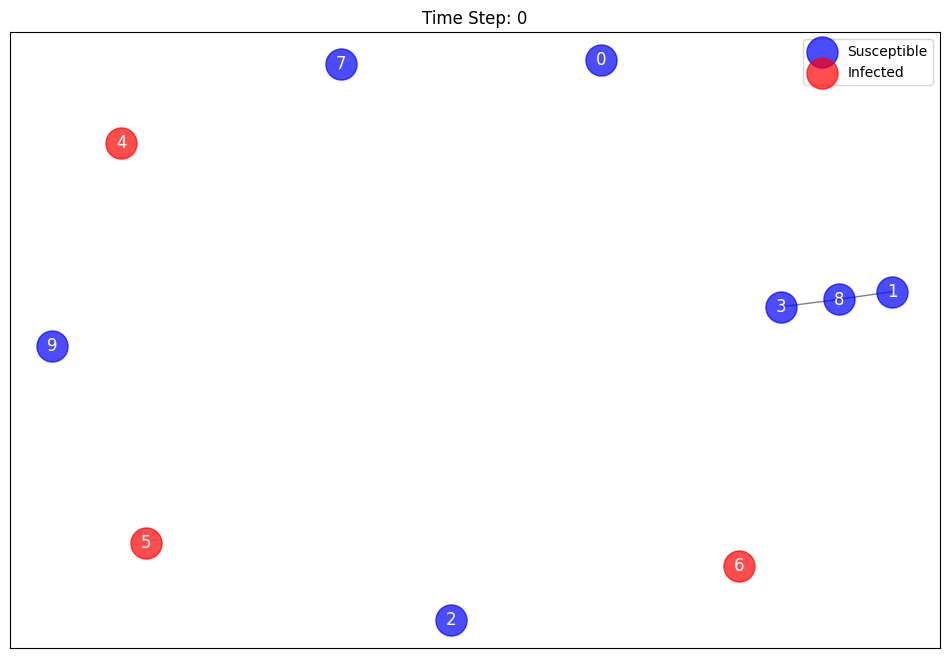

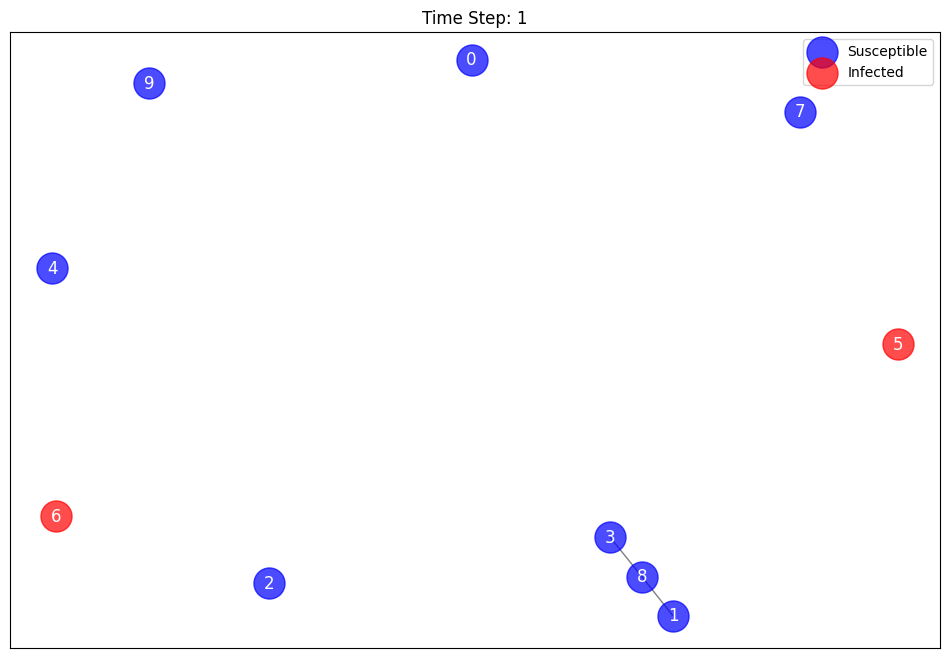

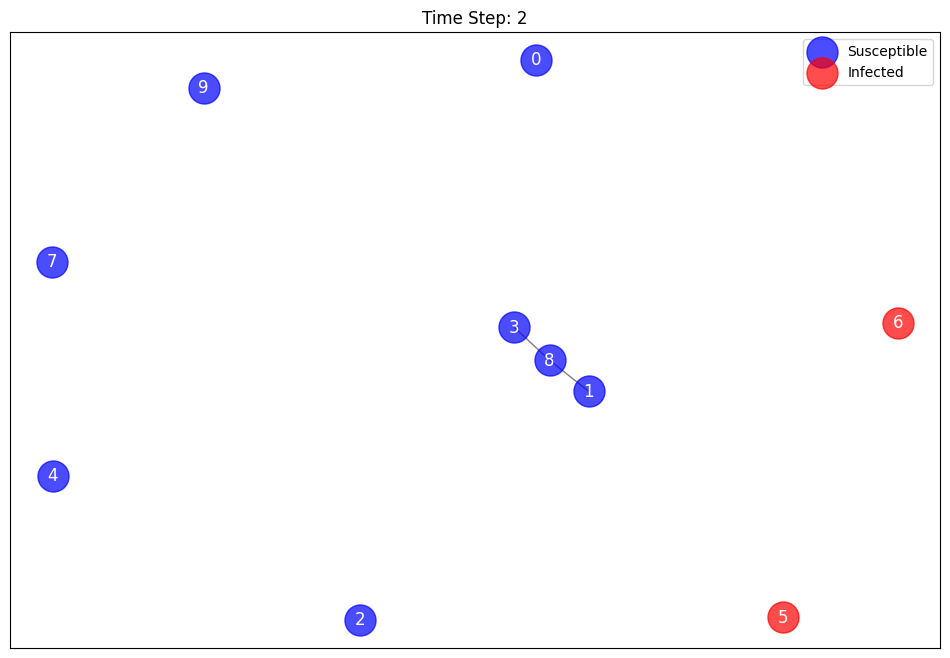

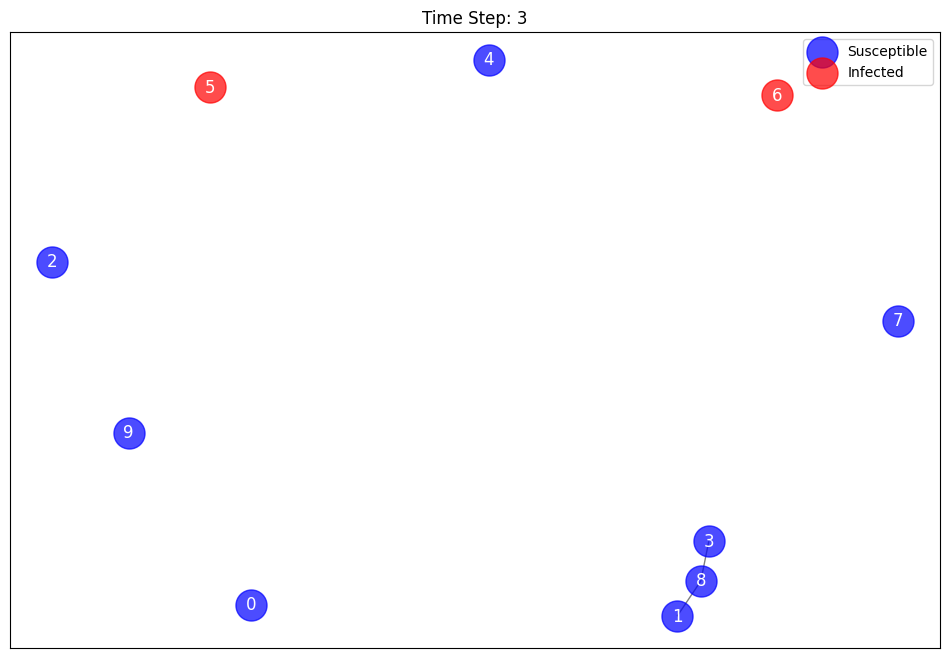

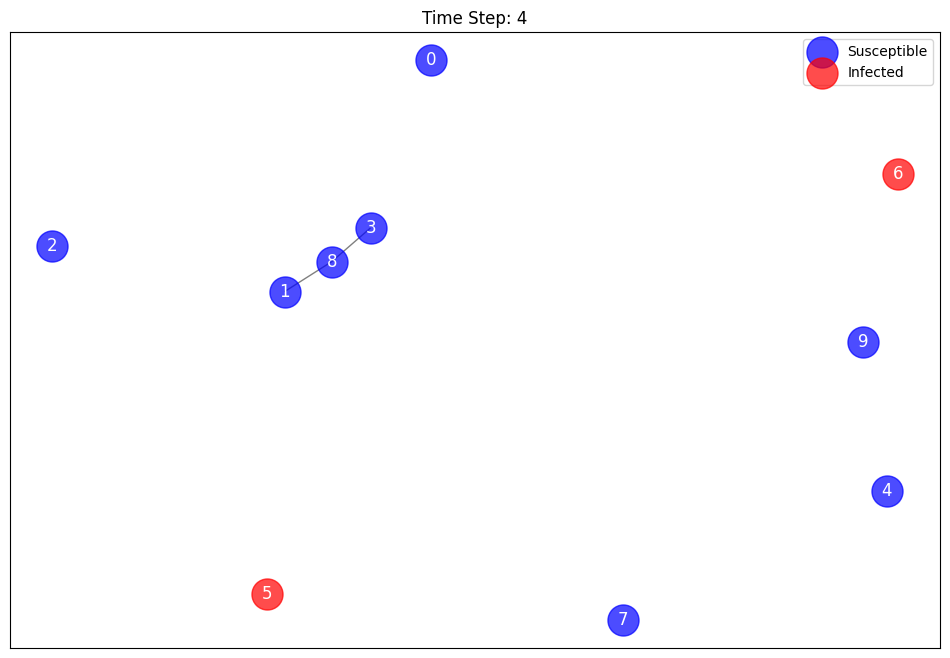

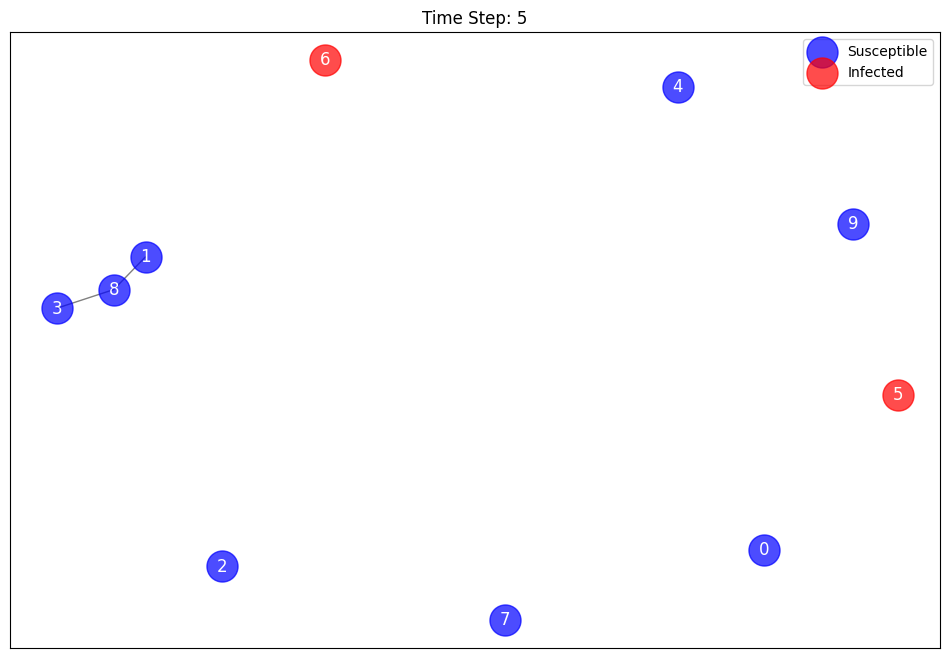

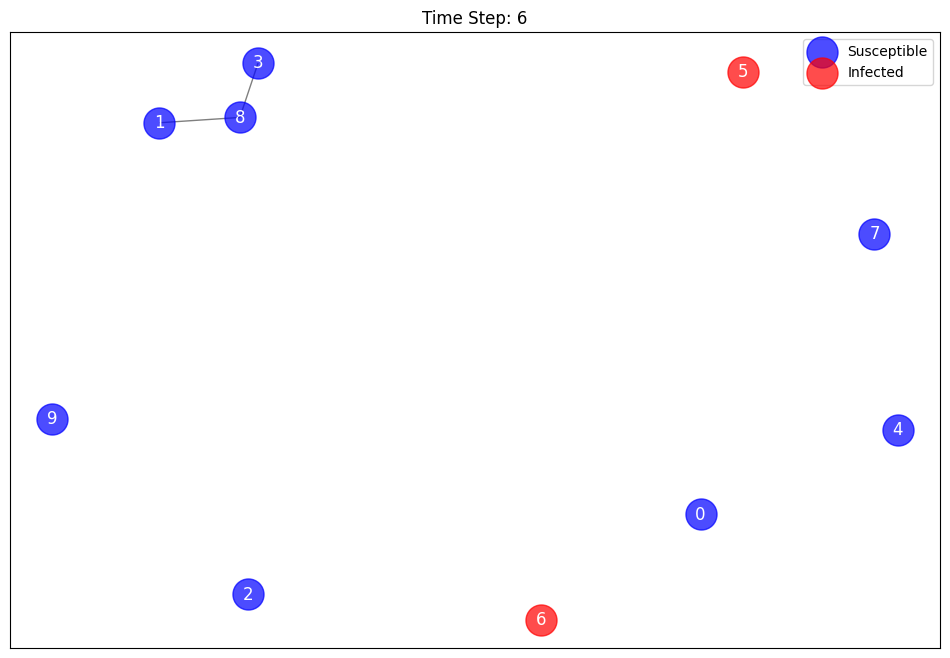

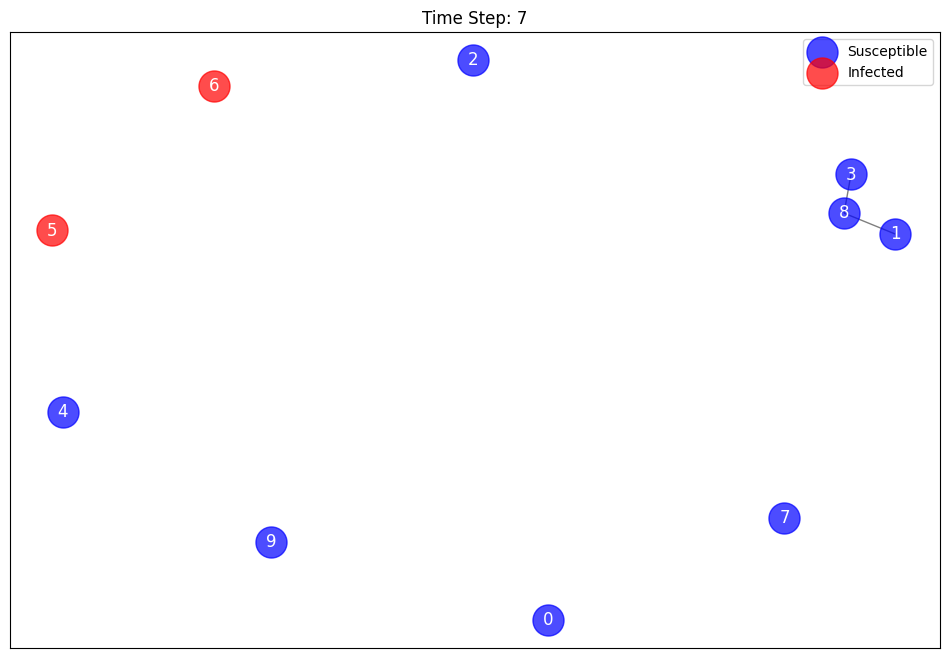

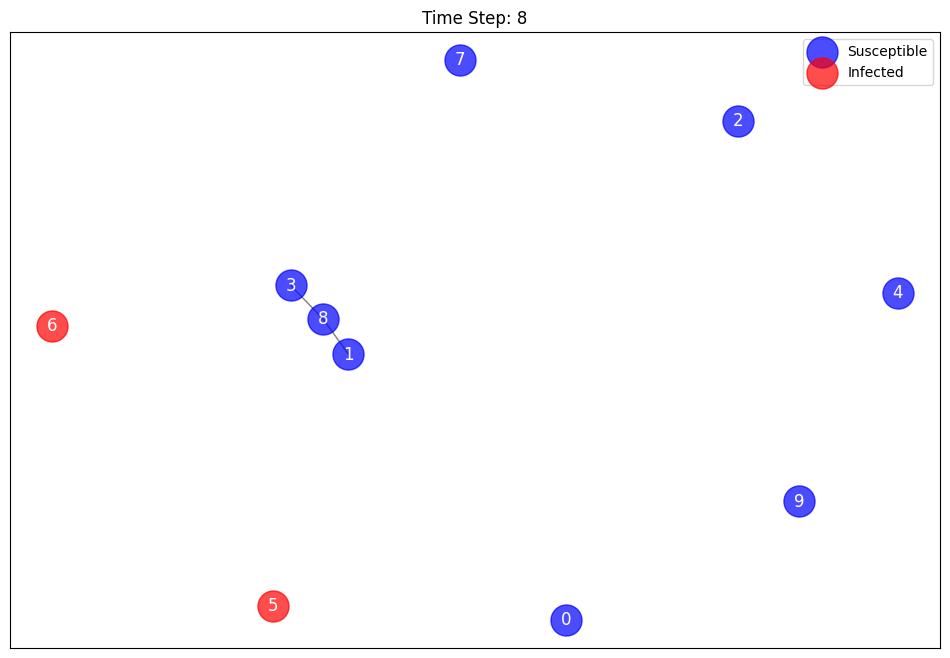

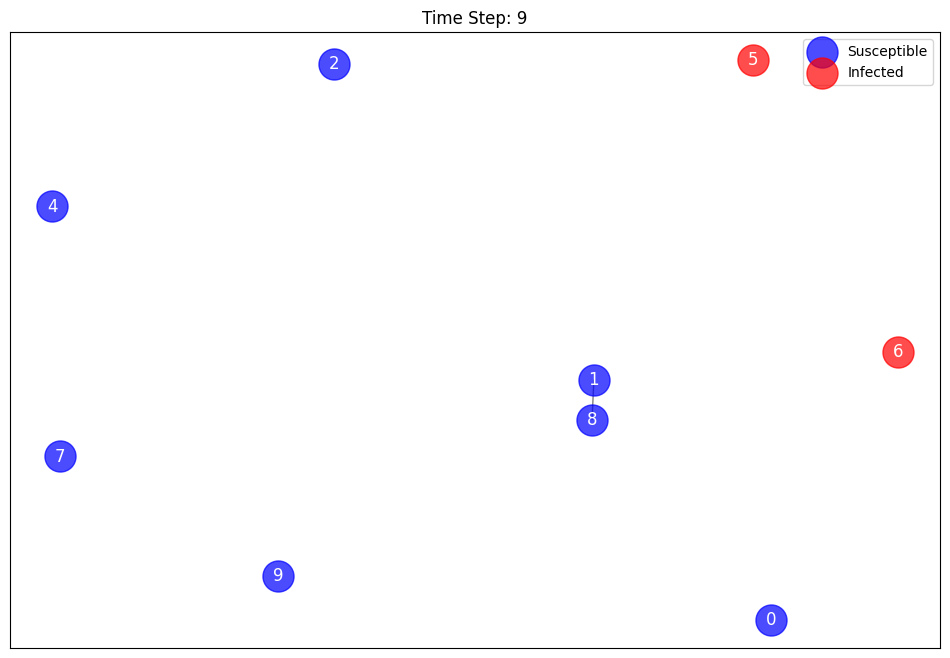

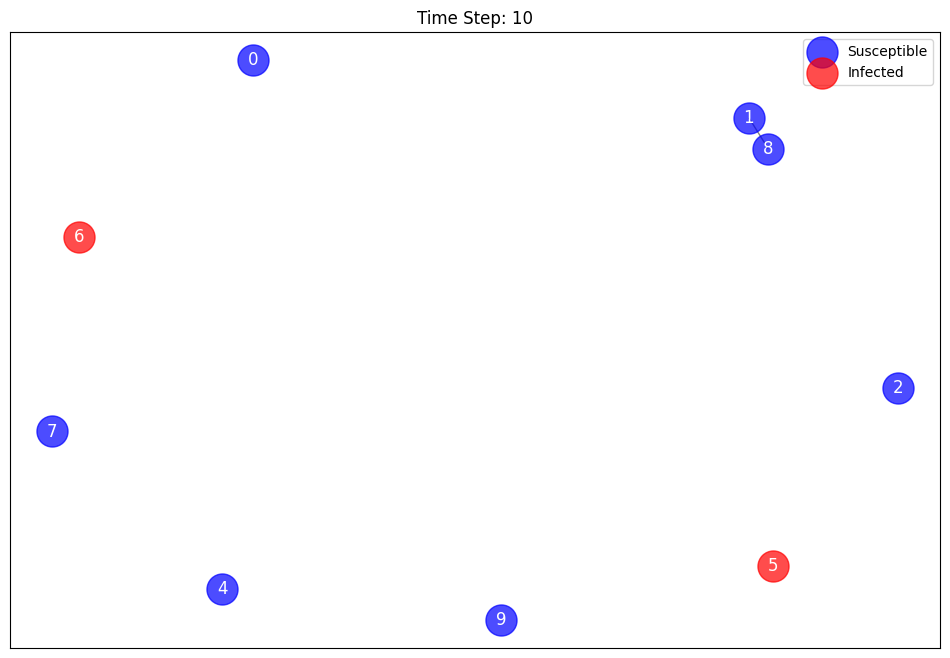

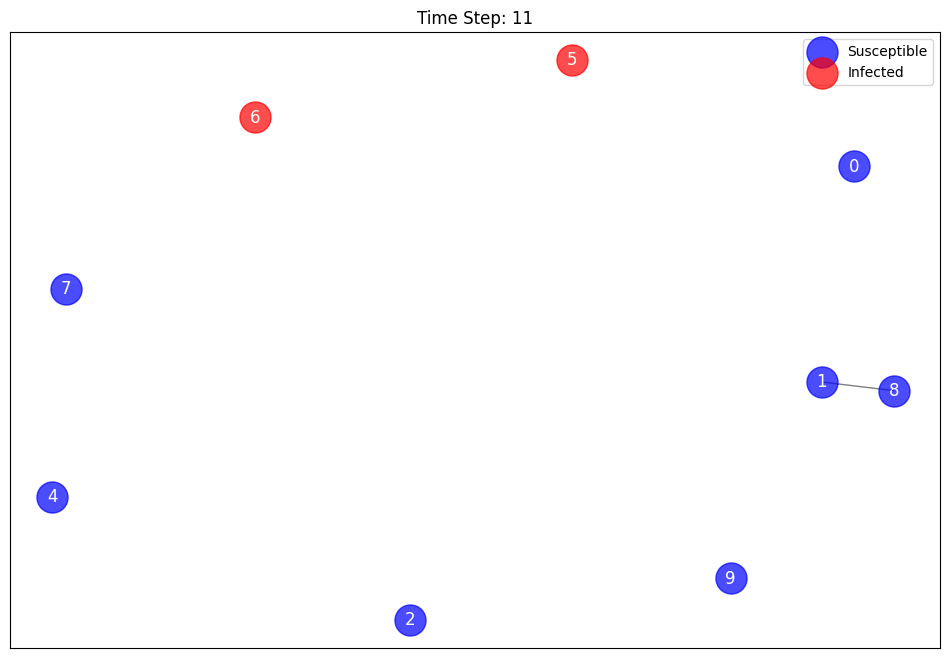

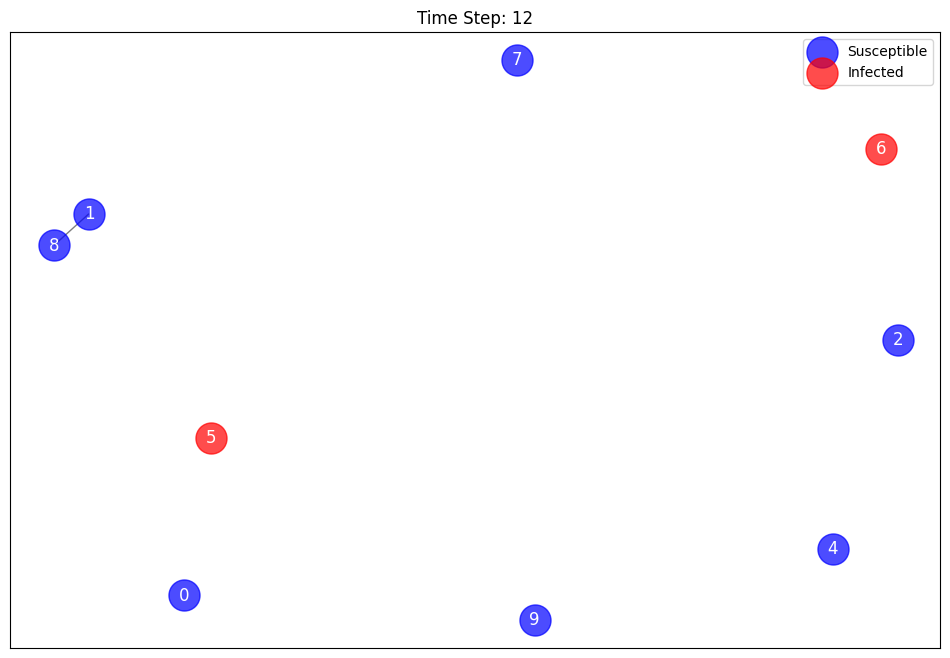

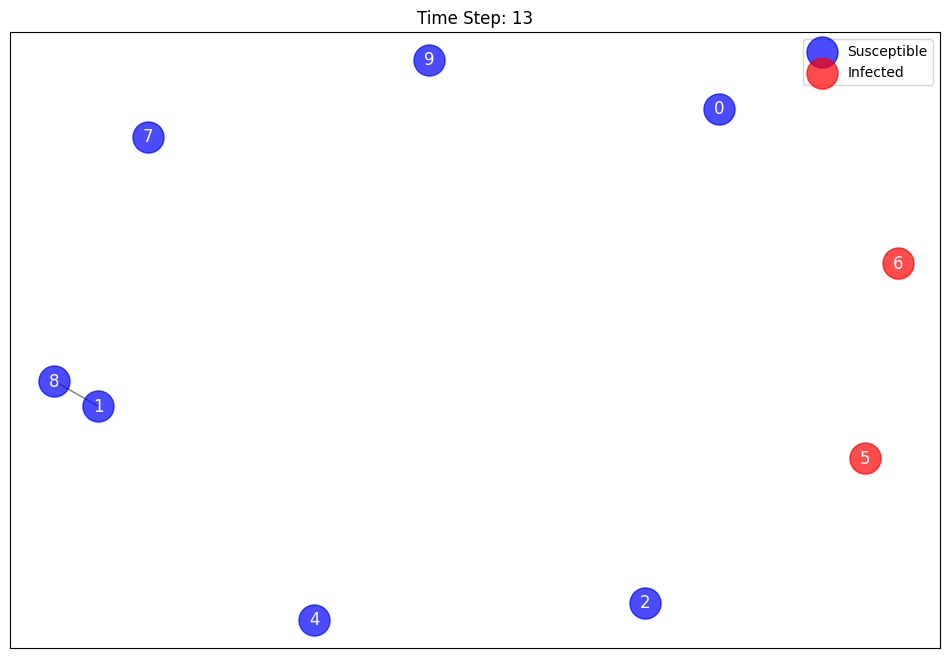

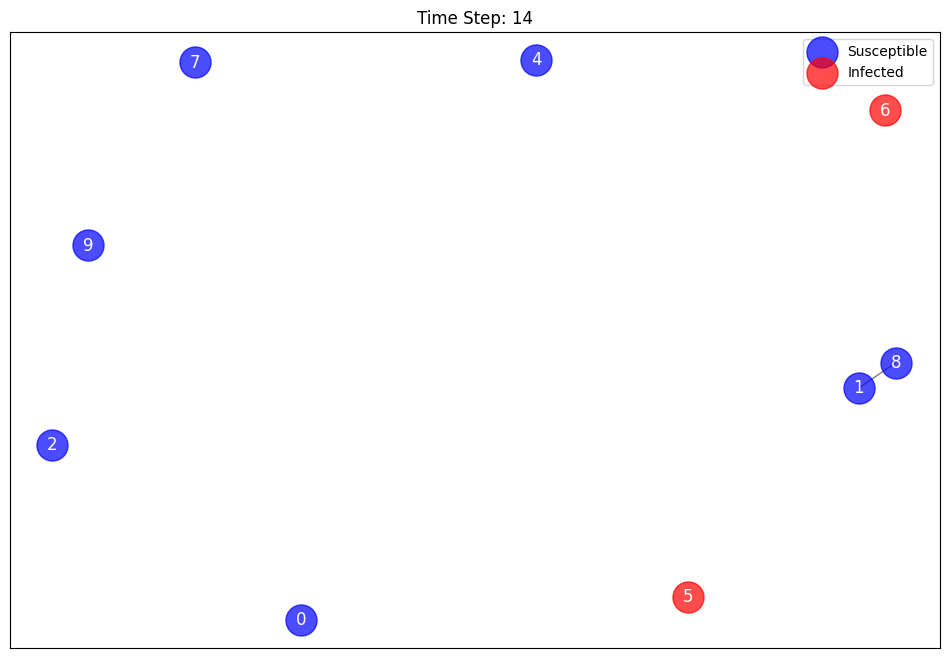

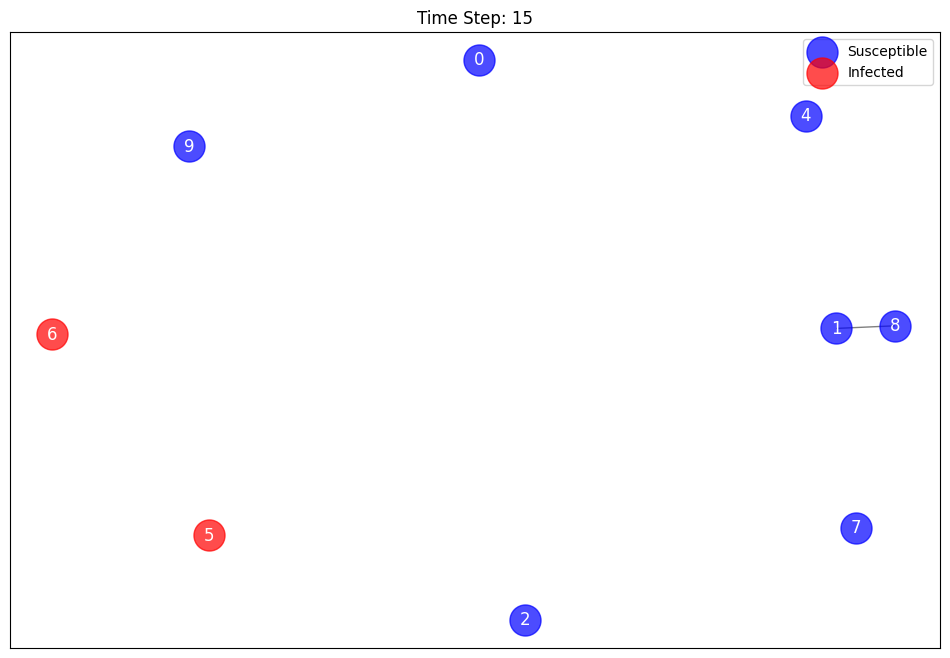

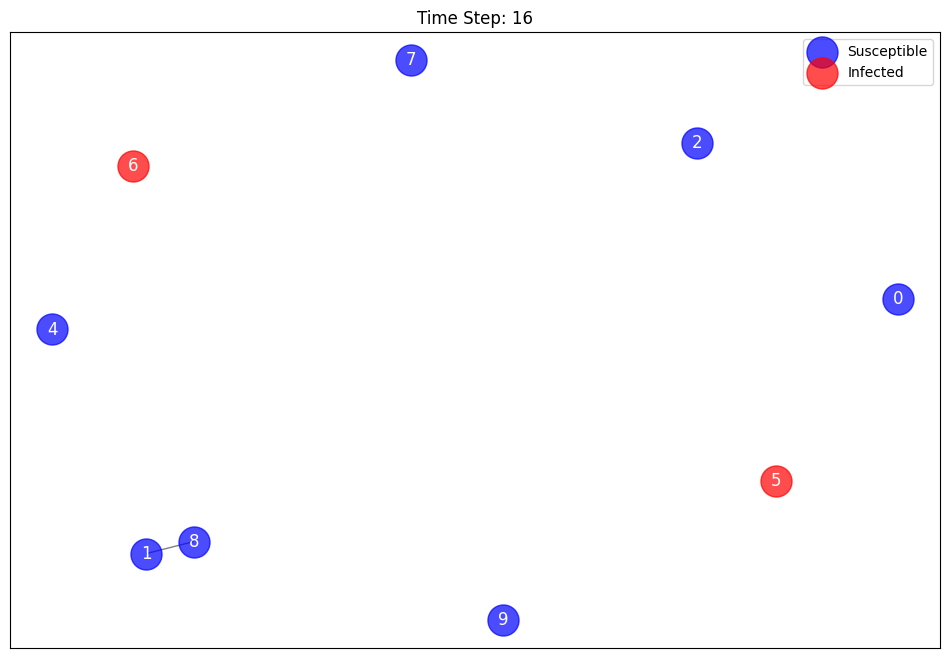

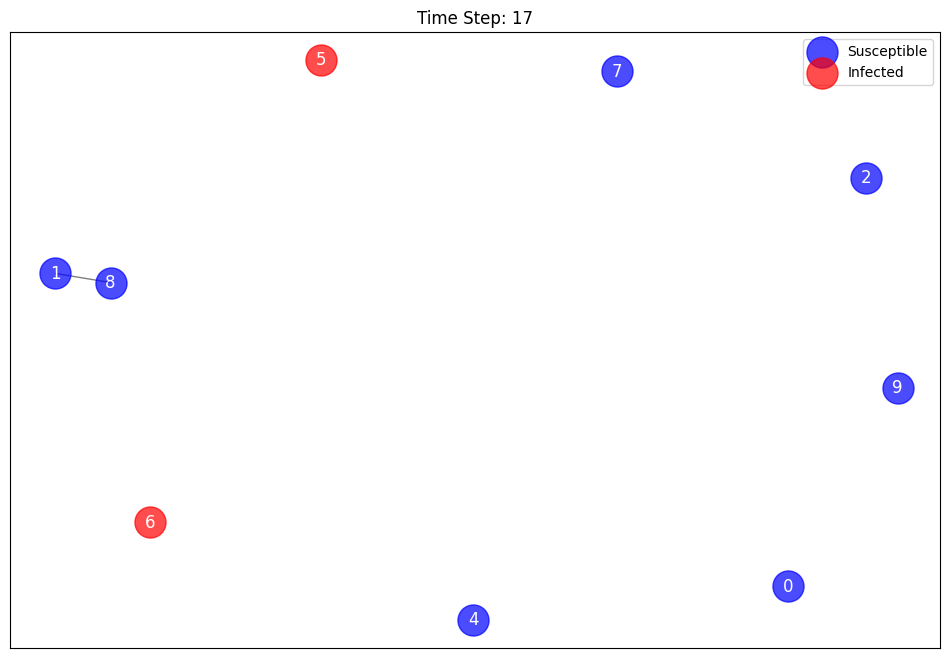

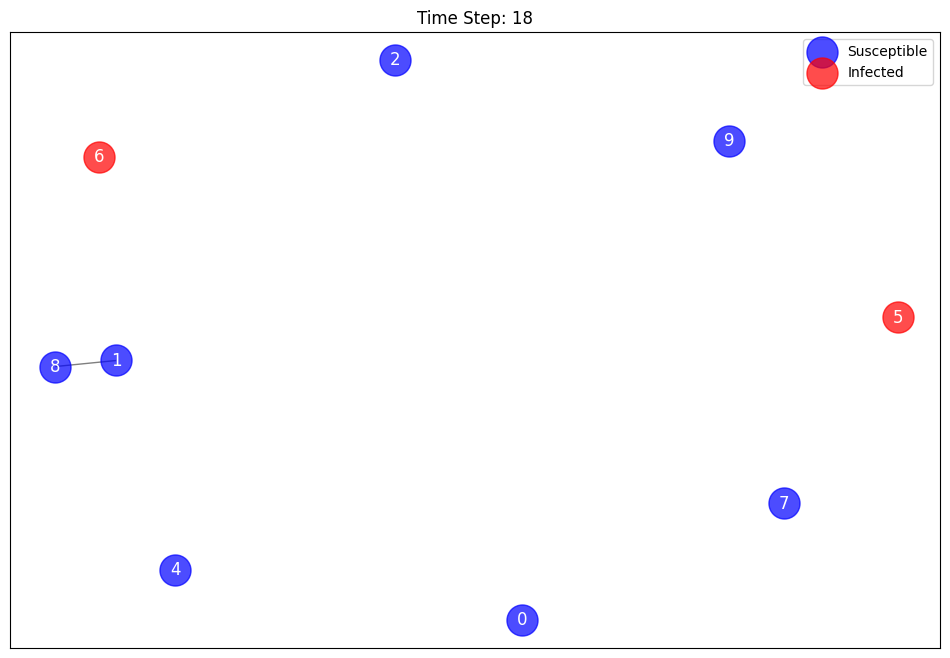

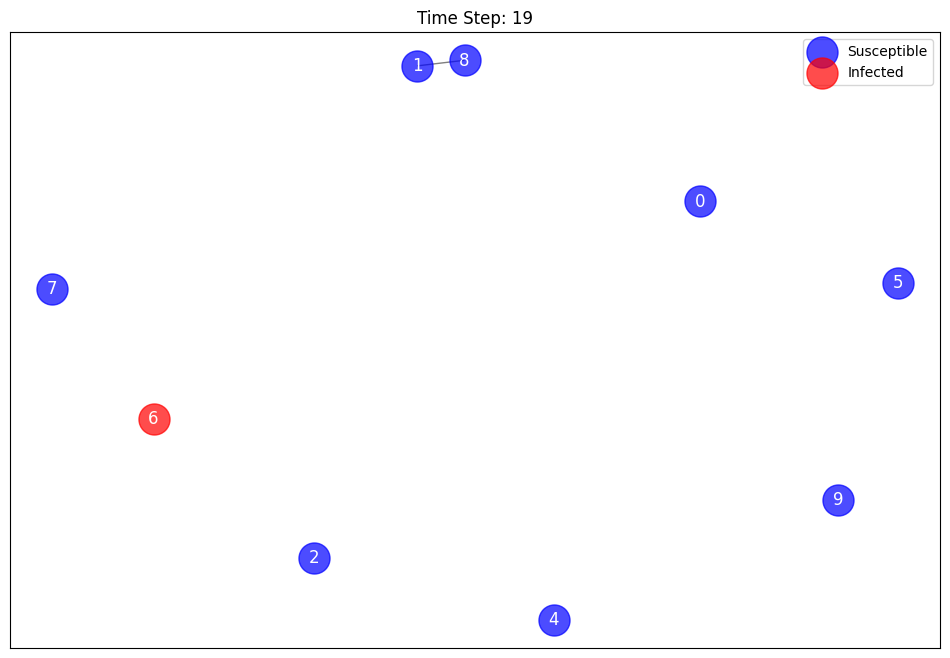

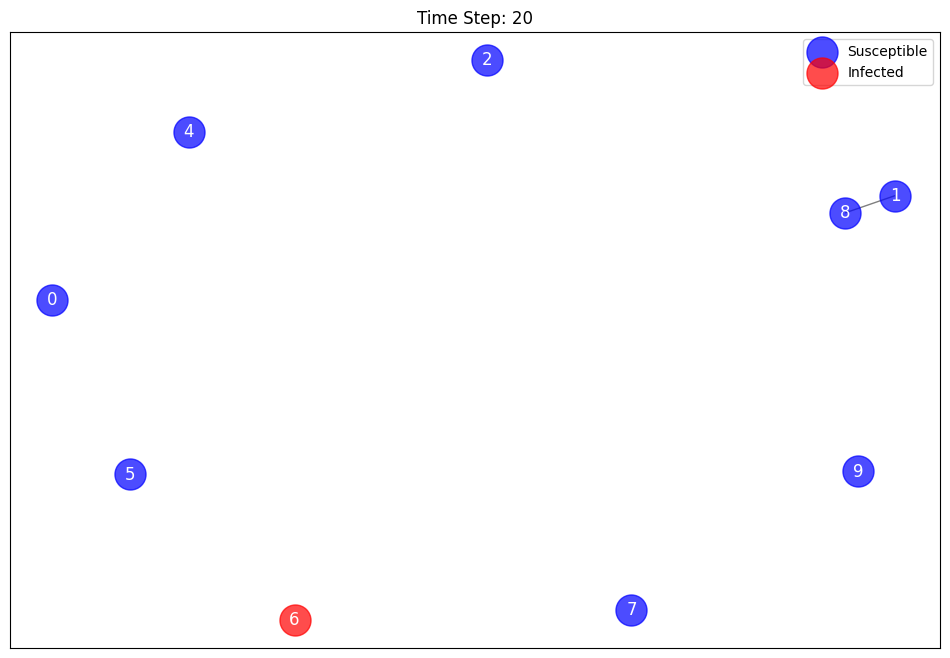

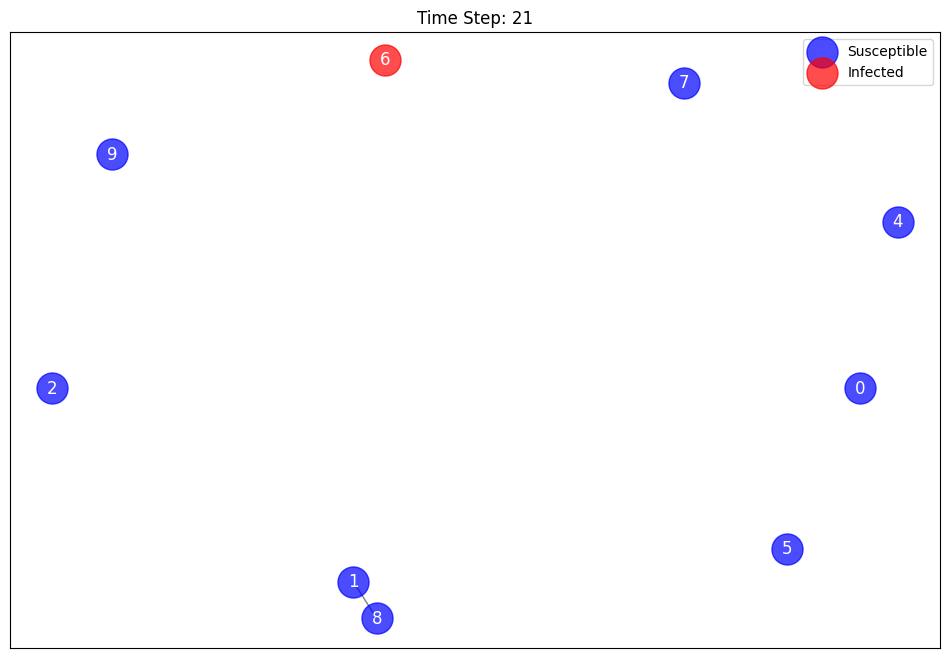

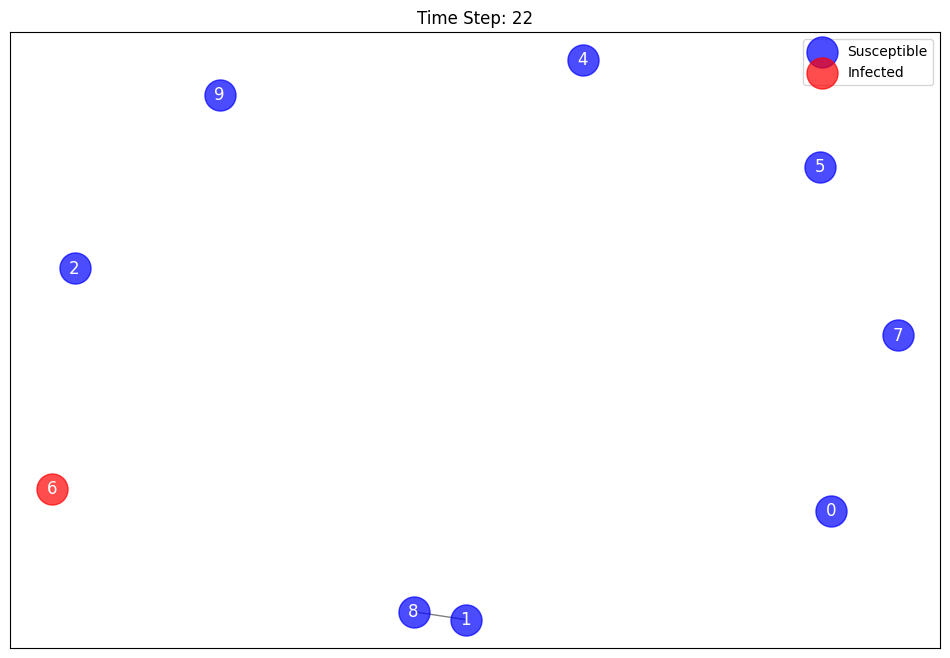

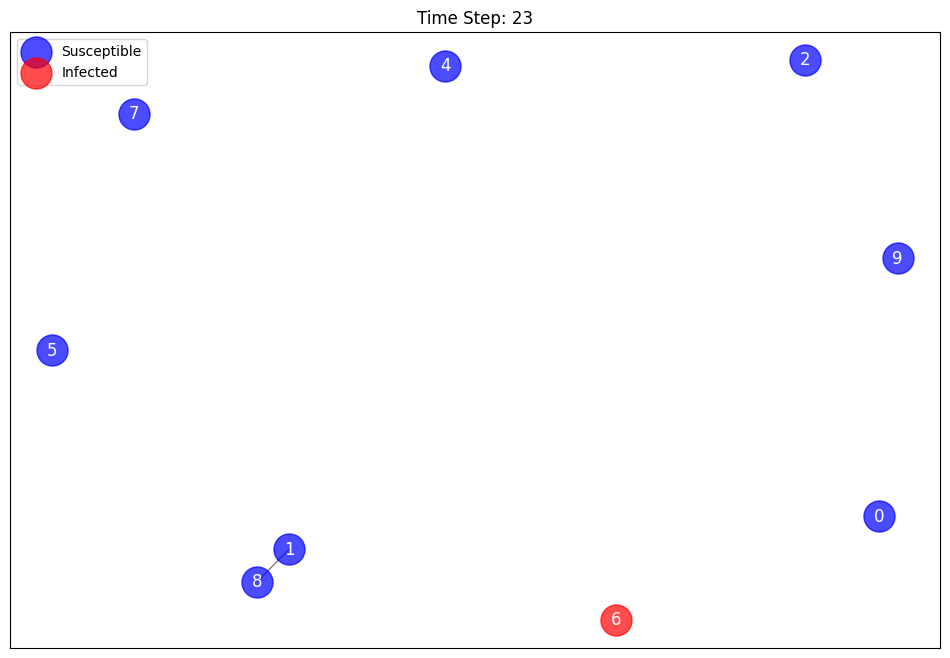

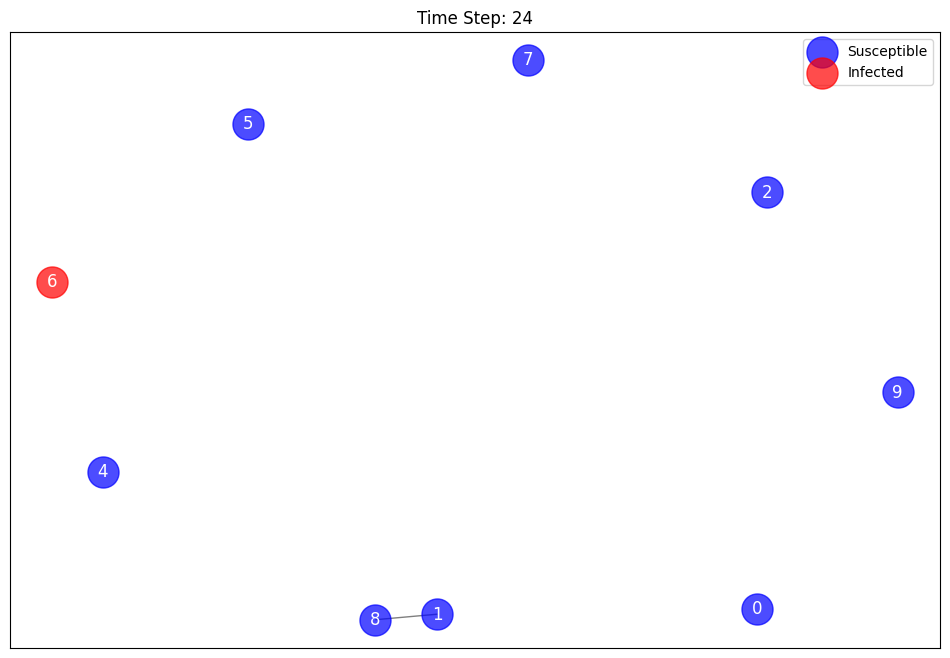

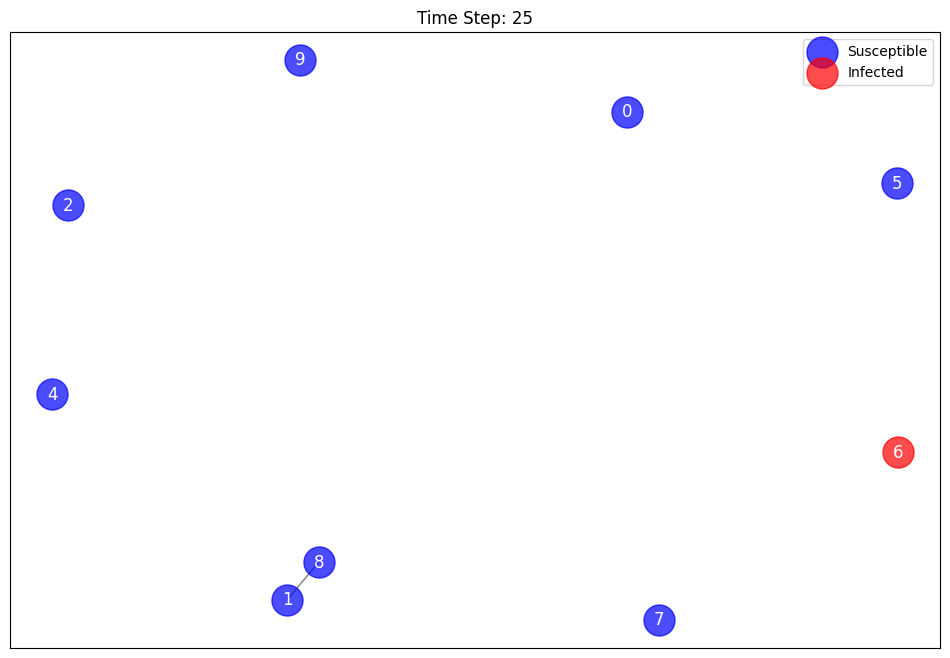

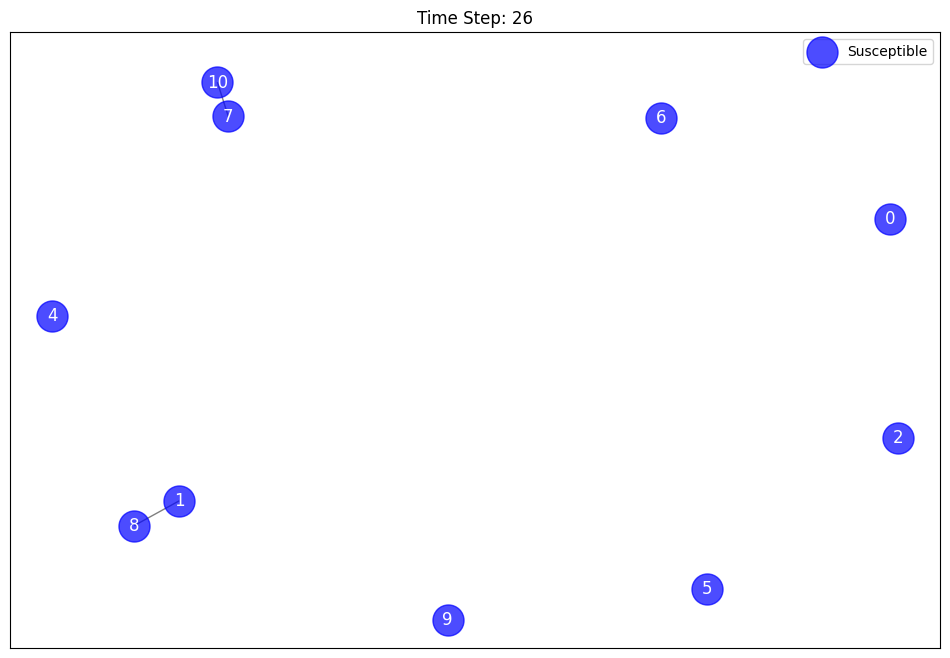

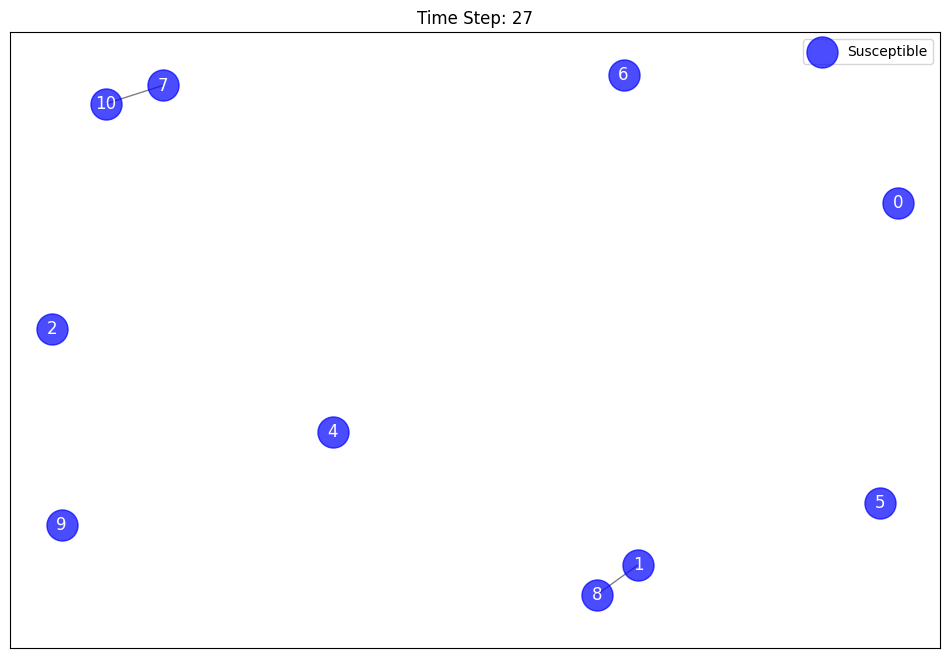

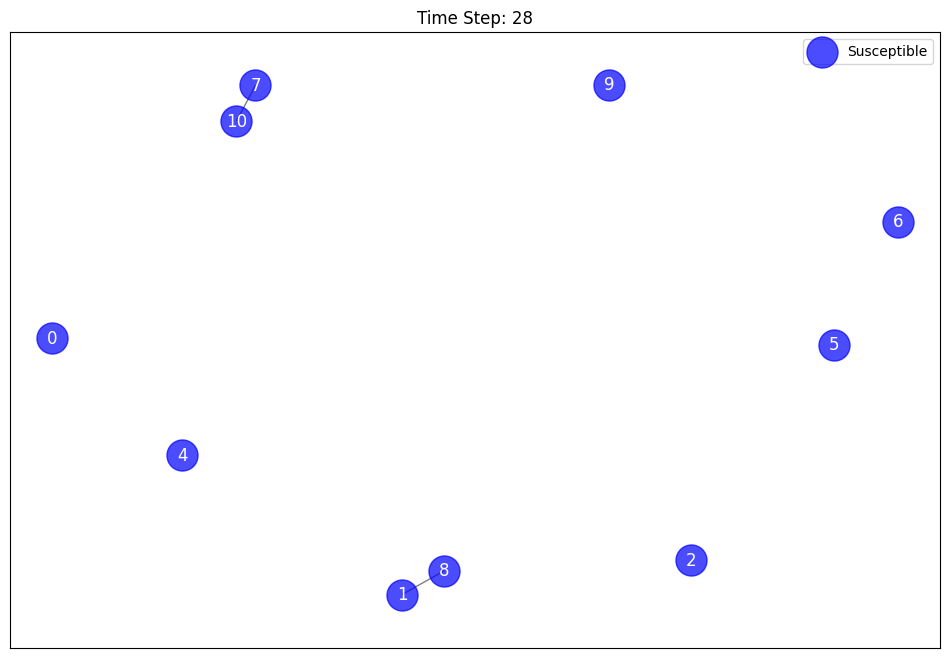

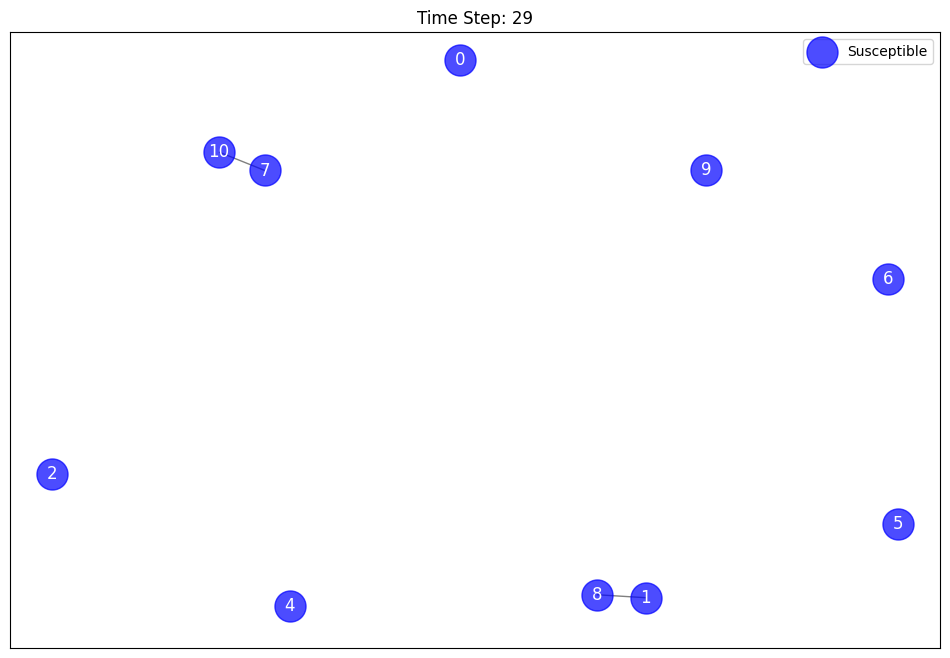

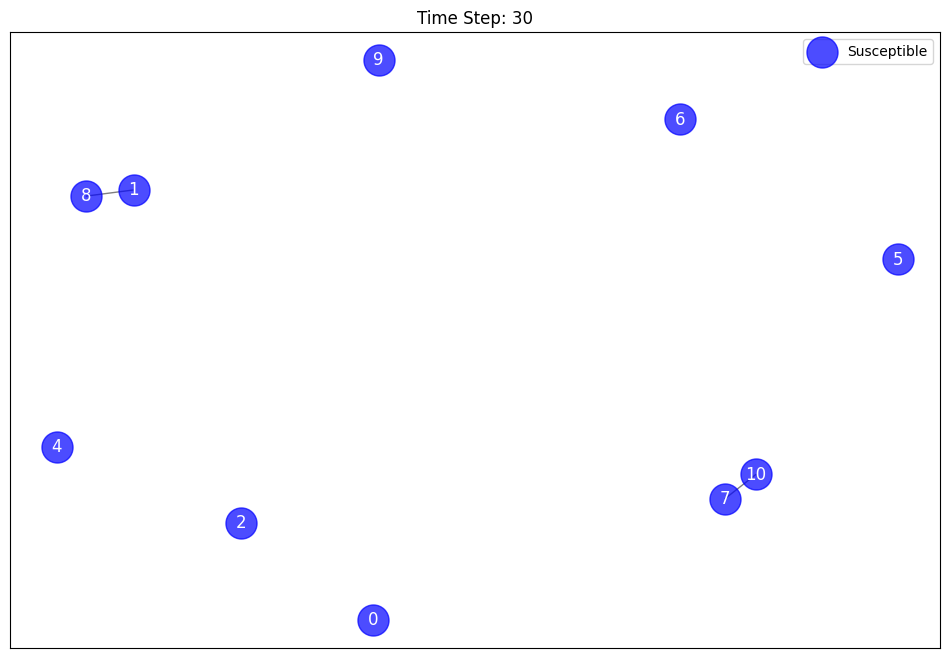

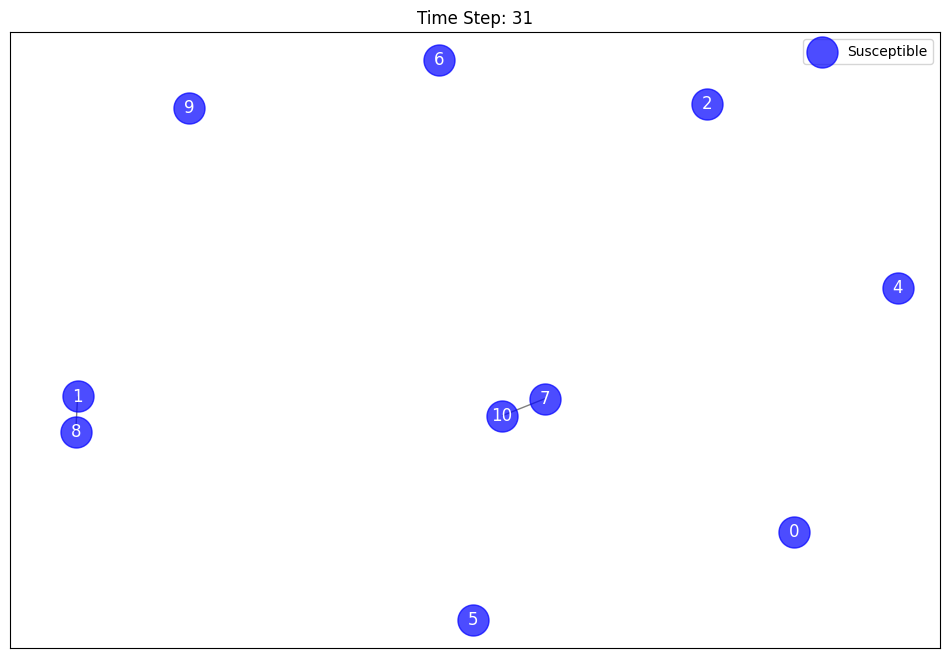

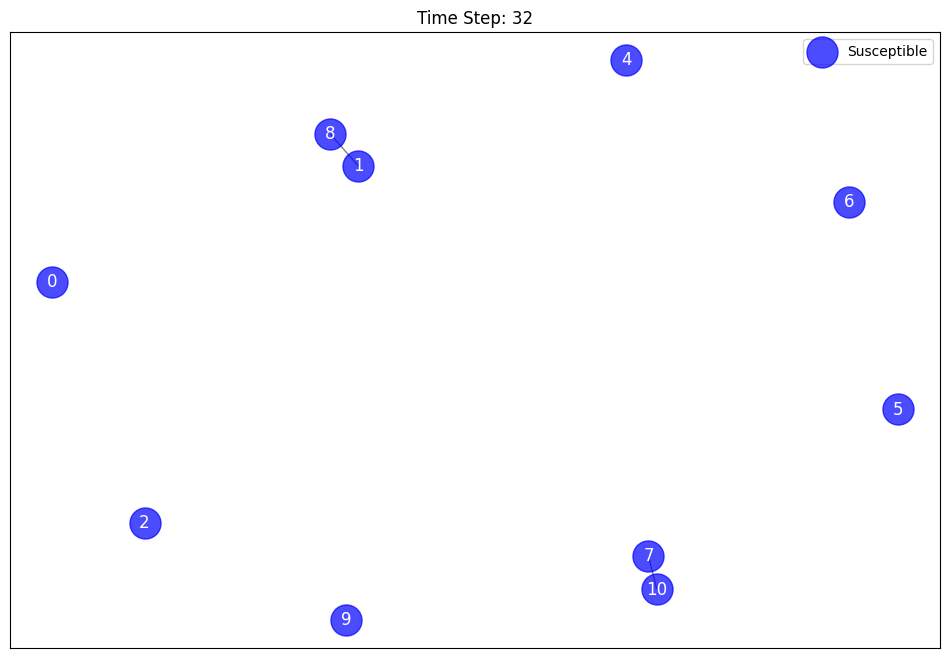

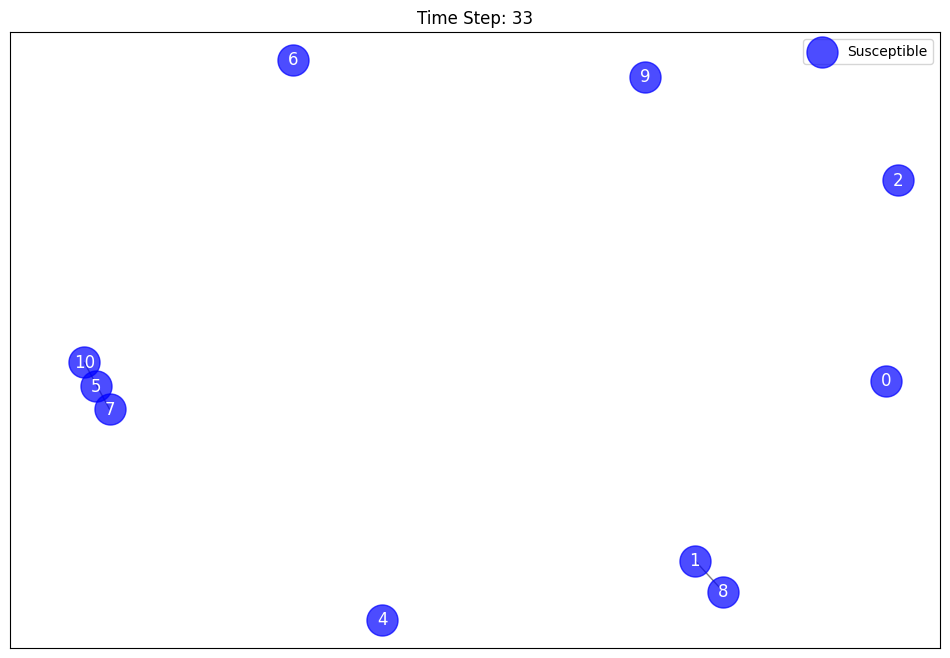

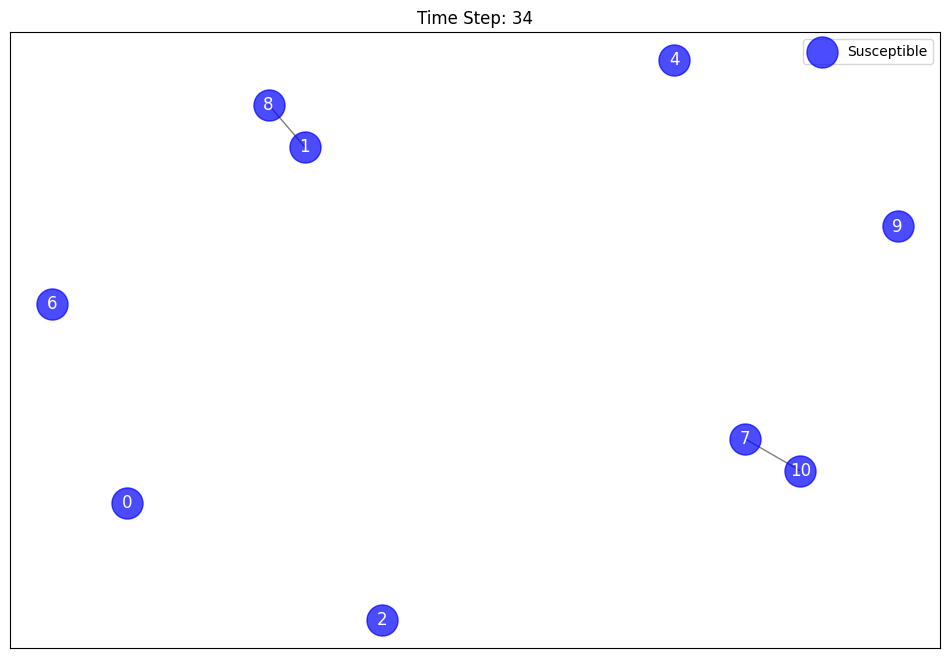

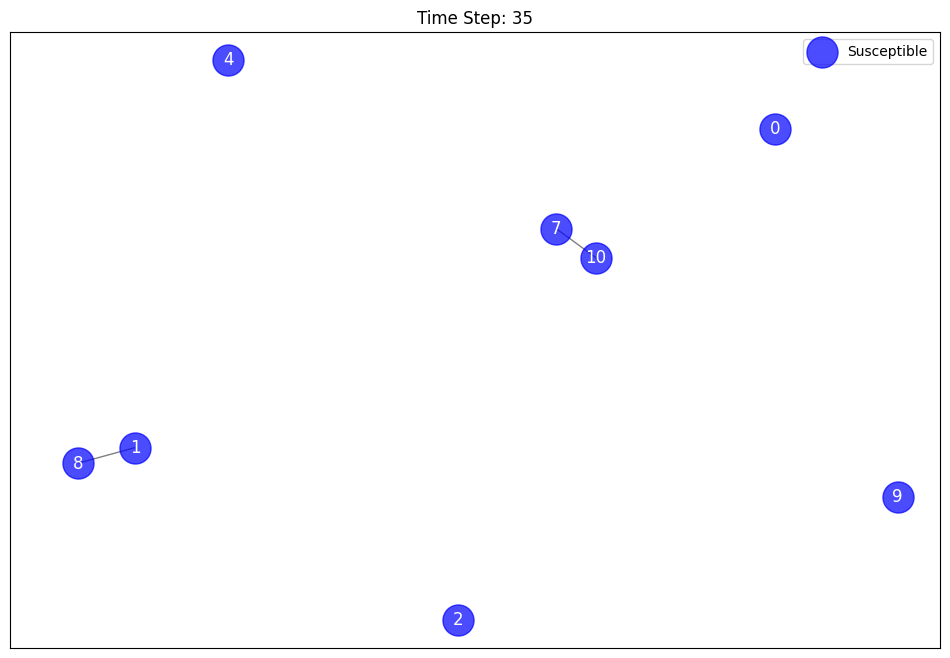

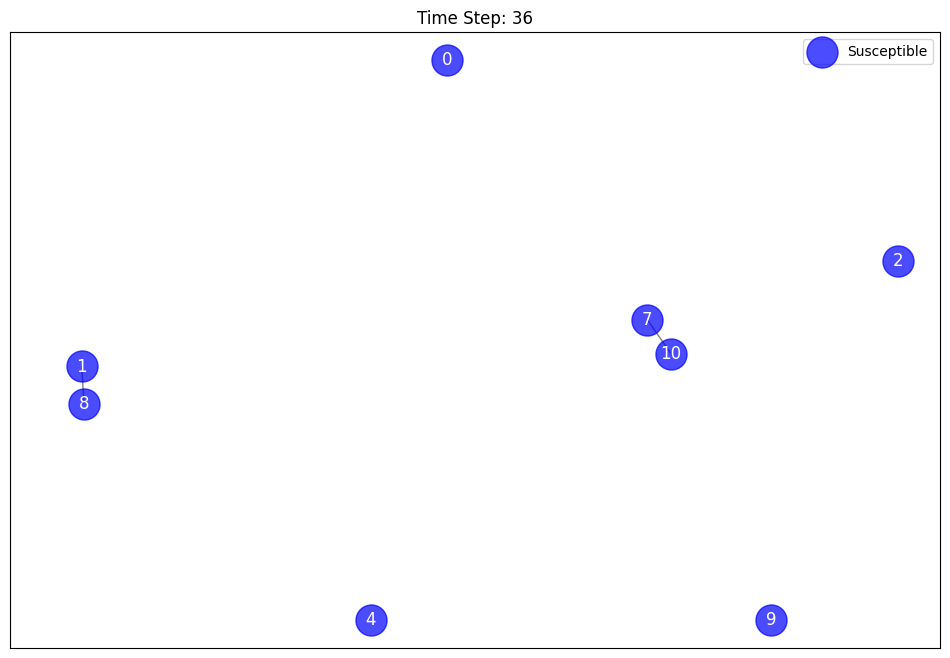

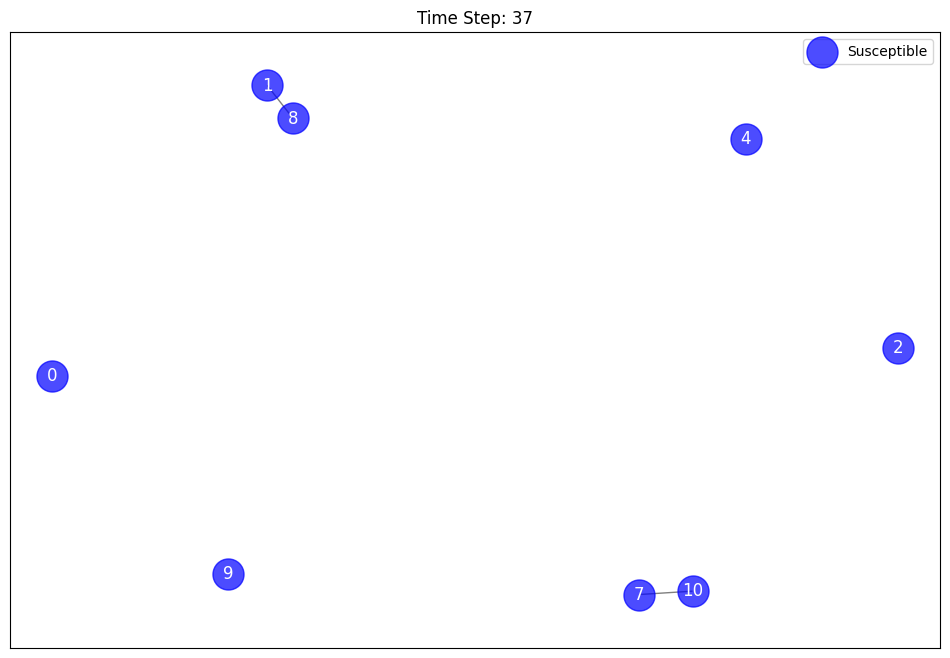

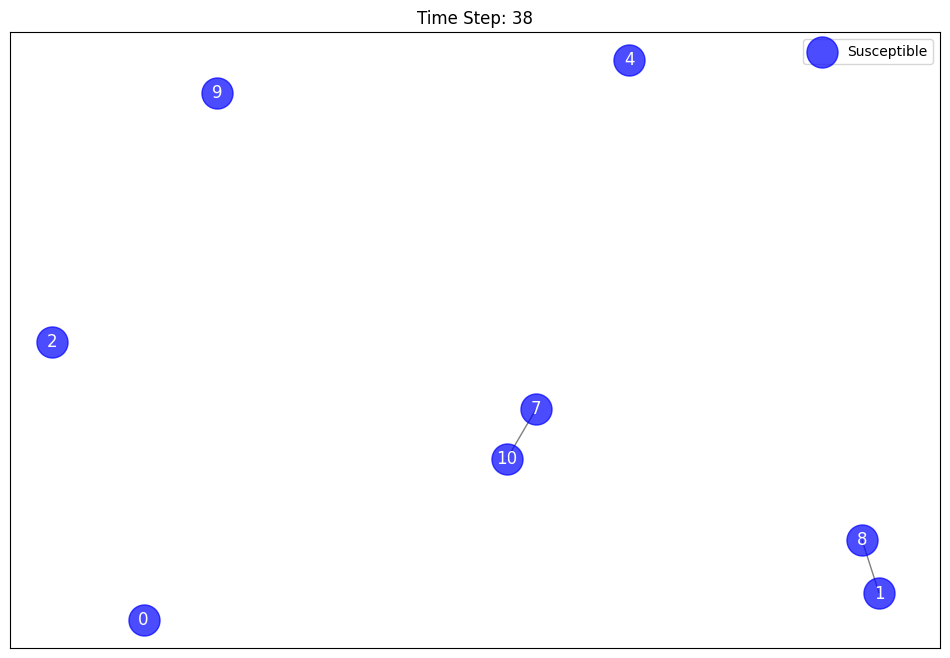

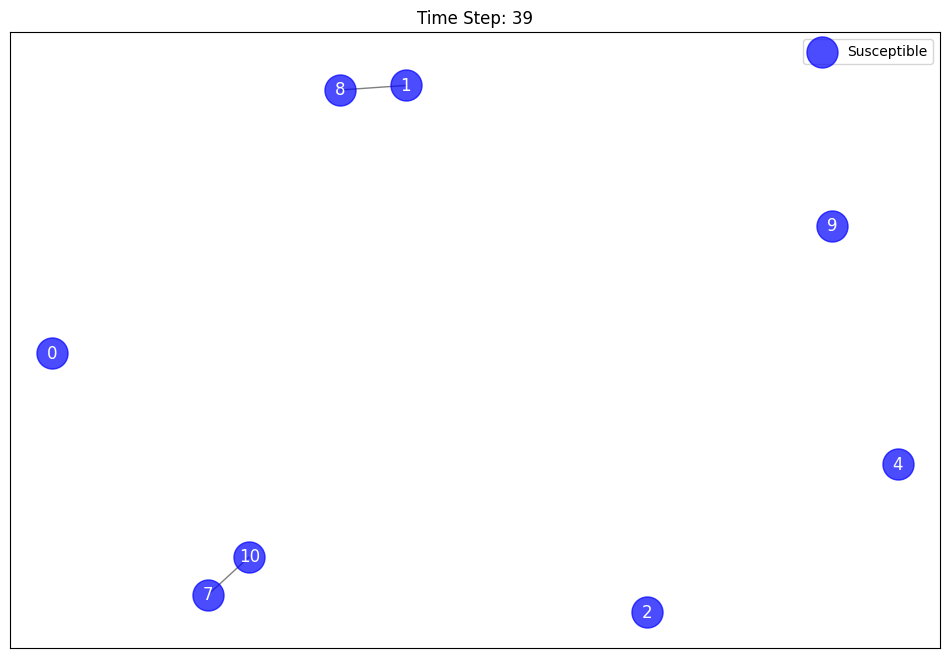

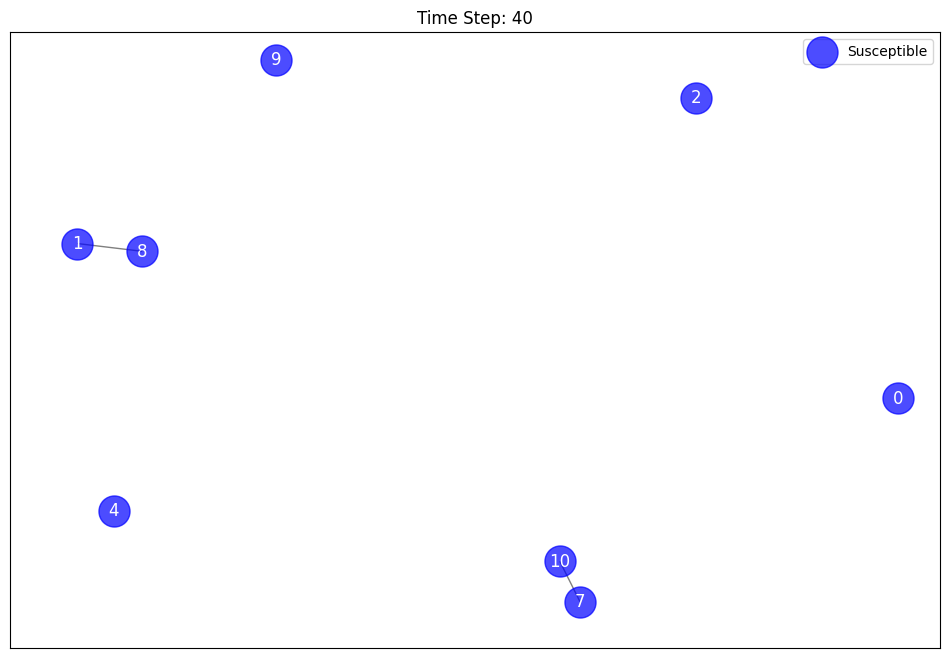

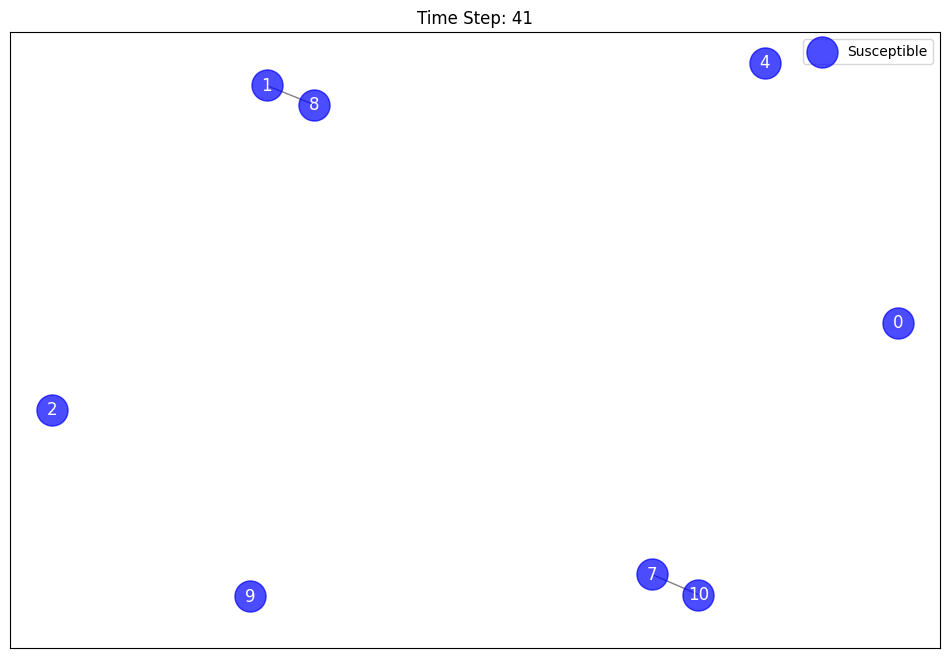

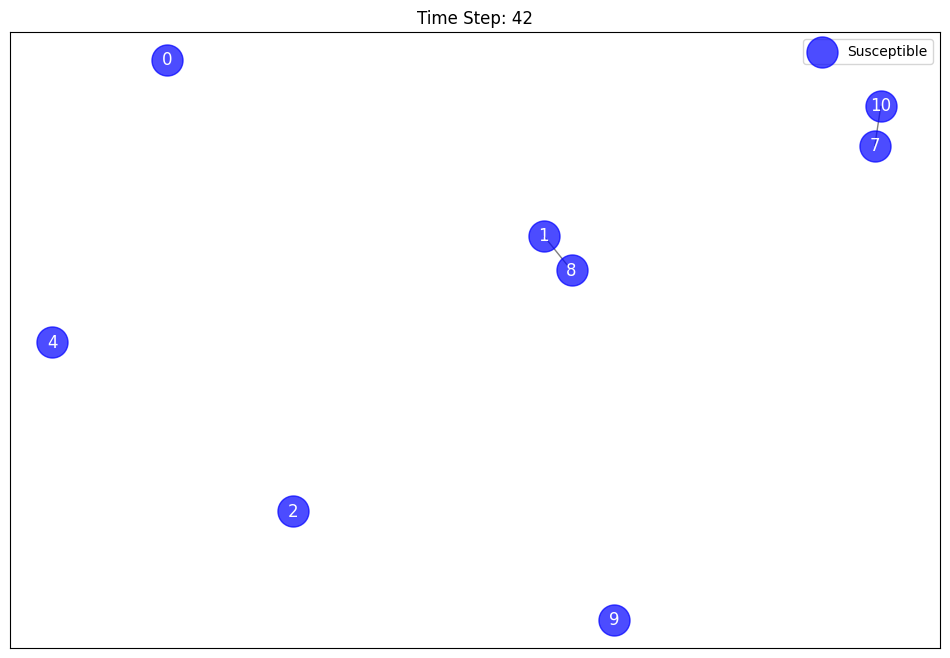

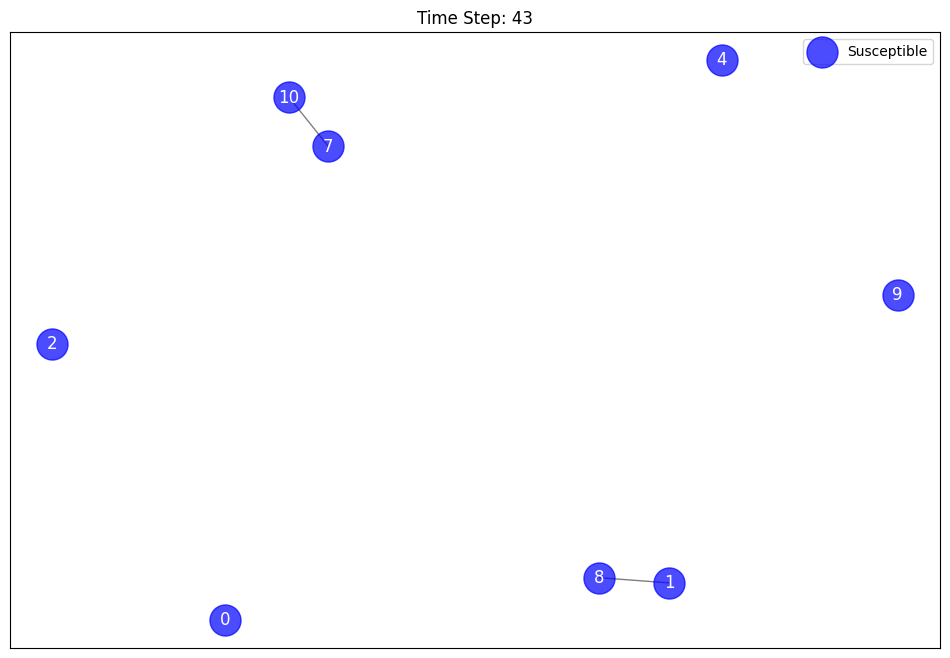

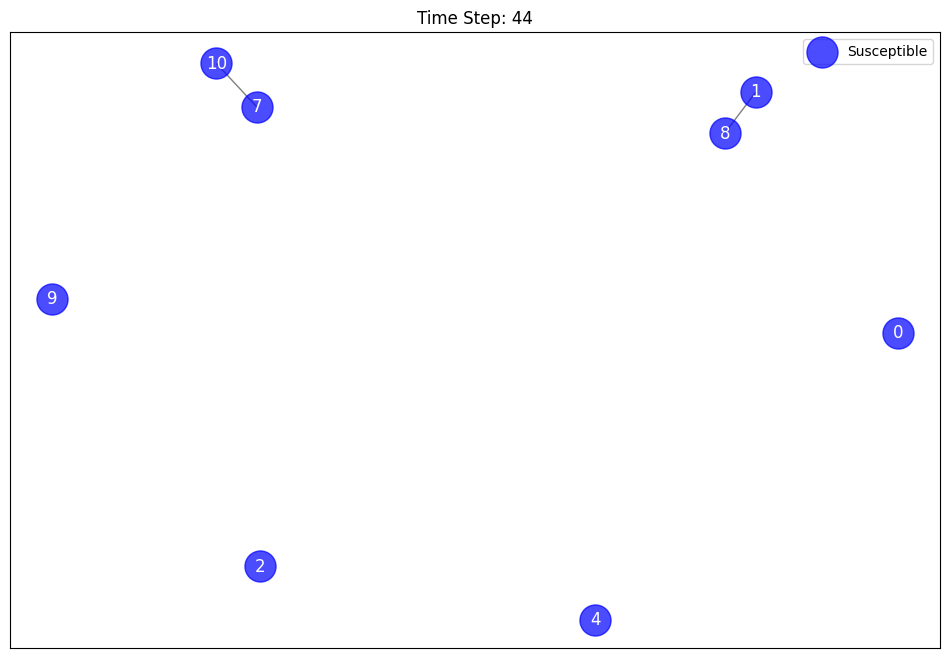

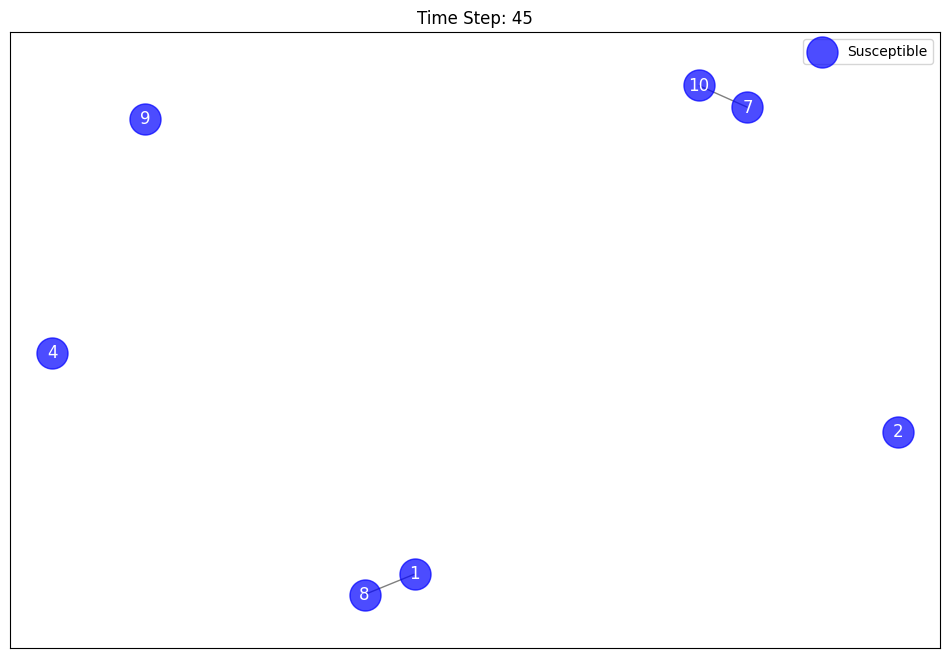

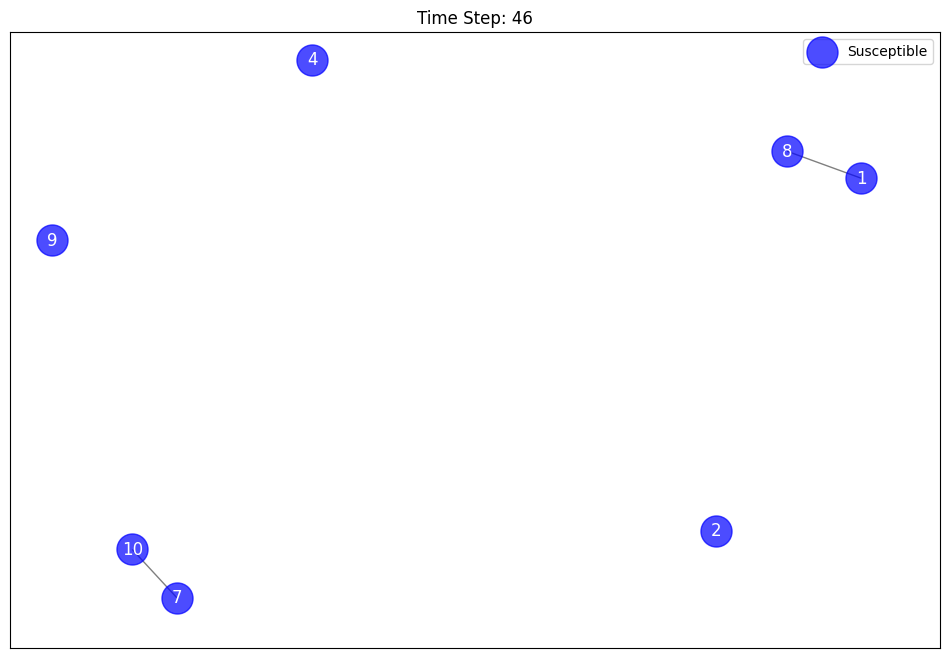

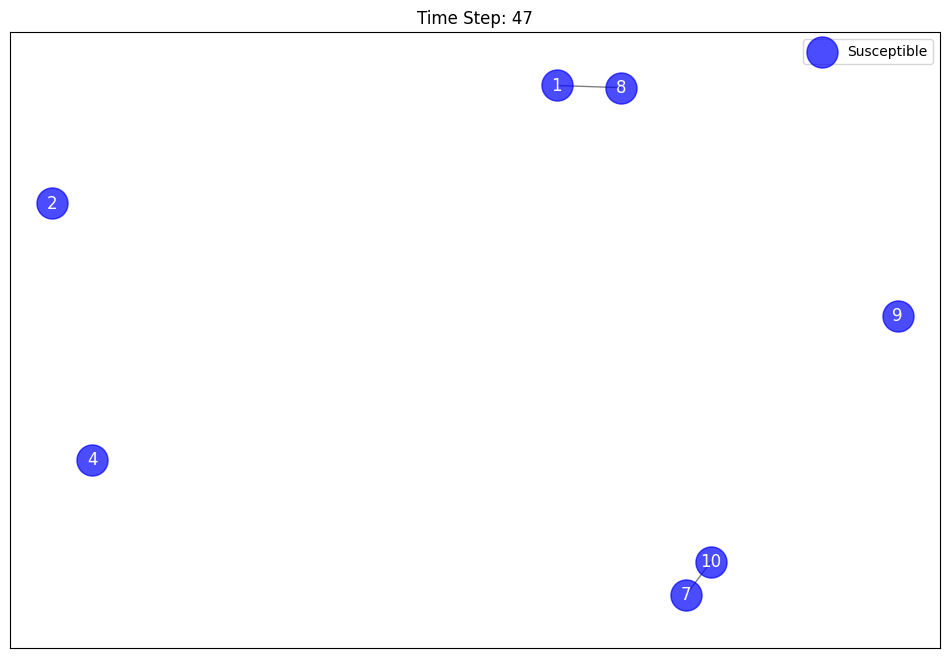

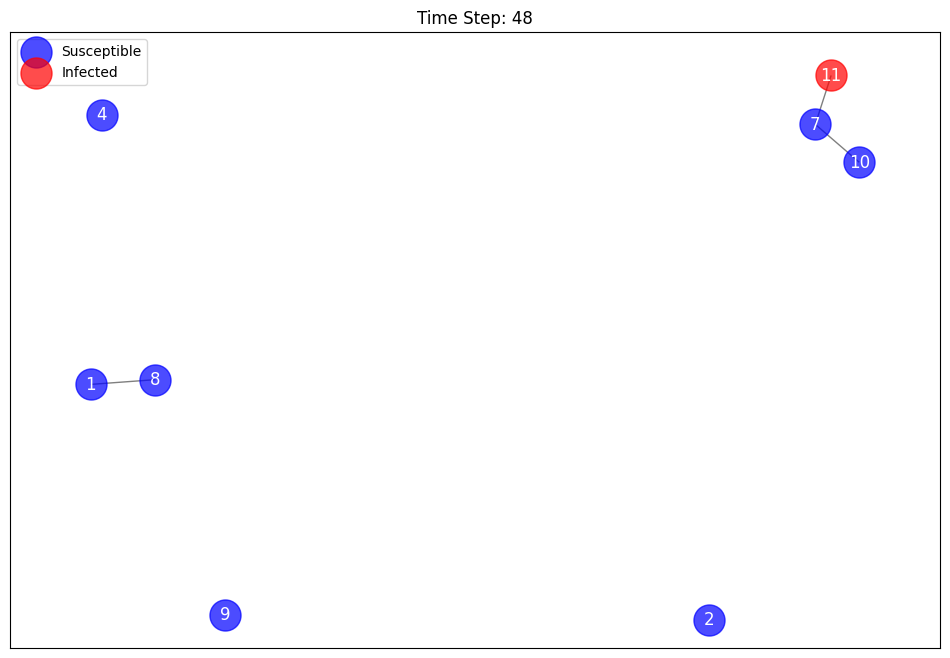

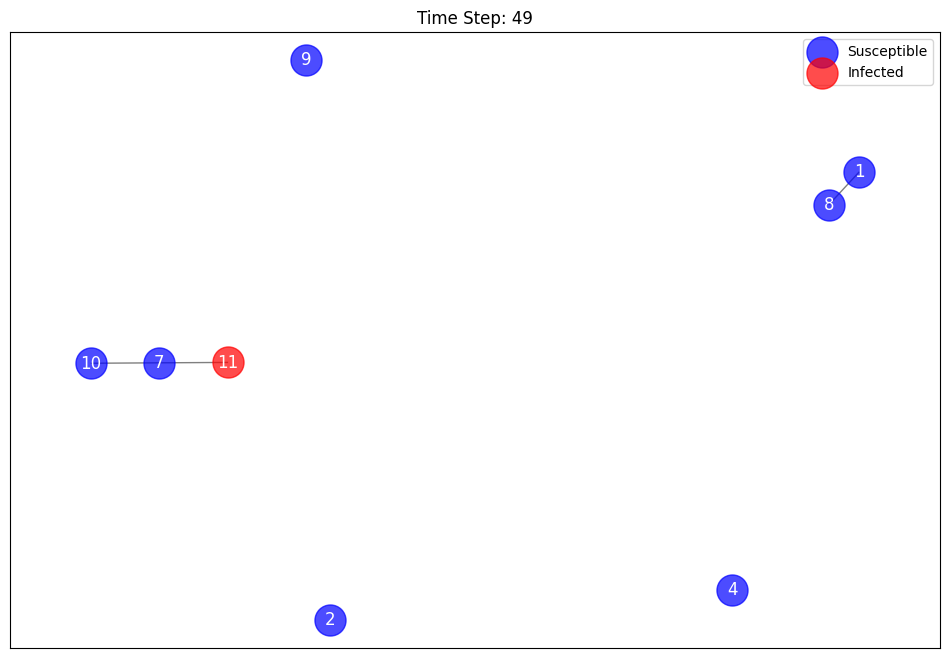

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Parameters
num_initial_nodes = 10
initial_infected_fraction = 0.2
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate
entry_rate = 0.05  # Rate at which new agents enter the network
exit_rate = 0.02  # Rate at which agents leave the network
time_steps = 50

# Initialize the network
G = nx.erdos_renyi_graph(num_initial_nodes, 0.1)
status = {node: 'I' if random.random() < initial_infected_fraction else 'S' for node in G.nodes()}

# Function to simulate one time step
def simulate_one_step(G, status):
    new_status = status.copy()

    # Infection and recovery dynamics
    for node in G.nodes():
        if status[node] == 'I':
            # Attempt to infect neighbors
            for neighbor in G.neighbors(node):
                if status[neighbor] == 'S' and random.random() < beta:
                    new_status[neighbor] = 'I'
            # Attempt to recover
            if random.random() < gamma:
                new_status[node] = 'S'

    # Agents leaving the network
    for node in list(G.nodes()):
        if random.random() < exit_rate:
            G.remove_node(node)
            del new_status[node]

    # Agents entering the network
    if random.random() < entry_rate:
        new_node = max(G.nodes(), default=-1) + 1
        G.add_node(new_node)
        new_status[new_node] = 'S' if random.random() < (1 - initial_infected_fraction) else 'I'
        # Randomly connect to existing nodes
        existing_nodes = list(G.nodes())
        if existing_nodes:
            connect_to = random.choice(existing_nodes)
            G.add_edge(new_node, connect_to)

    return new_status

# Function to draw the network
def draw_network(G, status, time_step):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))

    nx.draw_networkx_nodes(G, pos, nodelist=[node for node in status if status[node] == 'S'],
                           node_color='blue', node_size=500, alpha=0.7, label='Susceptible')
    nx.draw_networkx_nodes(G, pos, nodelist=[node for node in status if status[node] == 'I'],
                           node_color='red', node_size=500, alpha=0.7, label='Infected')

    existing_edges = [(u, v) for u, v in G.edges()]
    entering_edges = [(u, v) for u, v in G.edges() if u not in pos or v not in pos]

    nx.draw_networkx_edges(G, pos, edgelist=existing_edges, alpha=0.5)
    nx.draw_networkx_edges(G, pos, edgelist=entering_edges, alpha=0.5, style='dotted', edge_color='green')

    nx.draw_networkx_labels(G, pos, font_size=12, font_color='white')

    plt.title(f"Time Step: {time_step}")
    plt.legend()
    plt.show()

# Simulation
for time_step in range(time_steps):
    status = simulate_one_step(G, status)
    draw_network(G, status, time_step)


/tmp/ipykernel_34306/1950619666.py:37: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  connections = random.sample(G.nodes, k=random.randint(1, min(3, len(G.nodes))))


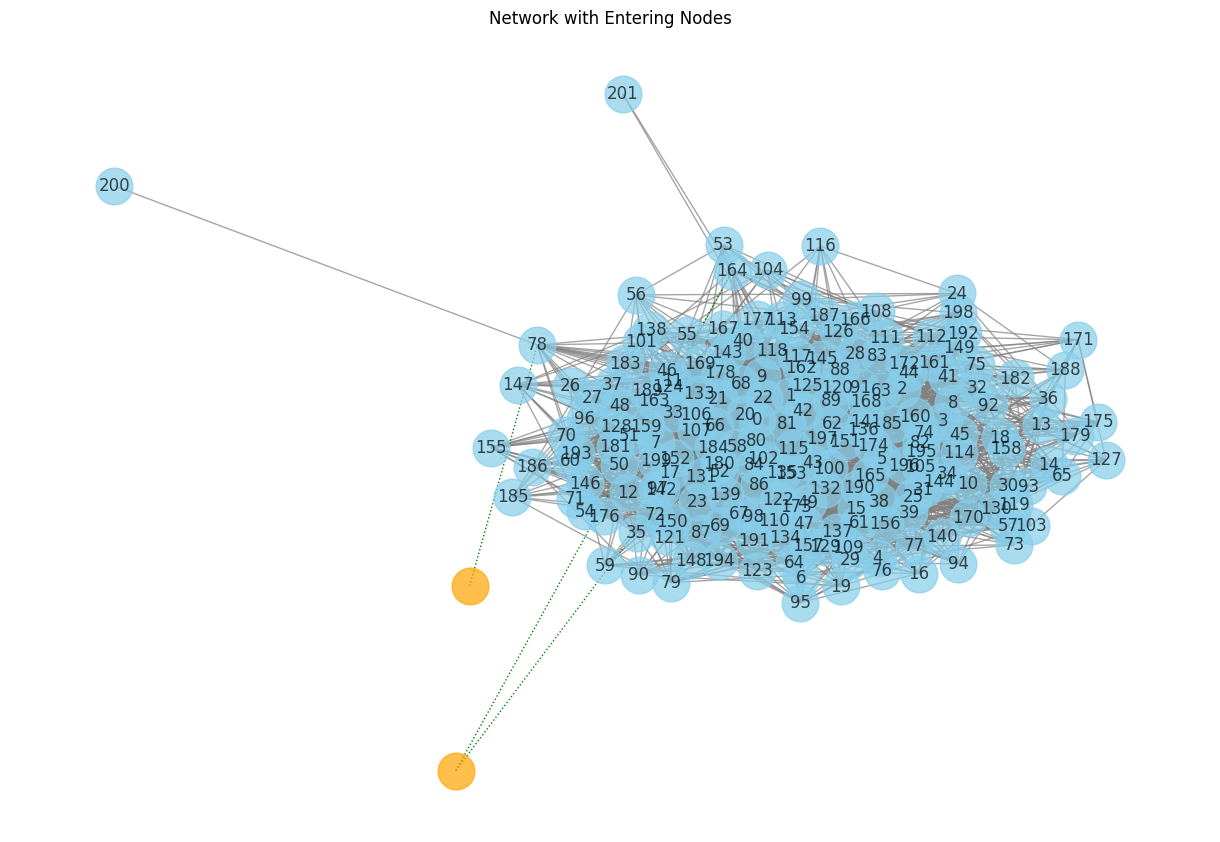

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Parameters
num_initial_nodes = 200
probability_of_edge = 0.1
num_entering_nodes = 2

# Initialize the network
G = nx.erdos_renyi_graph(num_initial_nodes, probability_of_edge)

# Function to draw the network with entering nodes
def draw_network_with_entering_nodes(G, entering_nodes):
    pos = nx.spring_layout(G)

    plt.figure(figsize=(12, 8))
    
    # Draw existing nodes and edges
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=700, alpha=0.7)
    
    # Draw entering nodes and their edges
    for new_node, connections in entering_nodes.items():
        pos[new_node] = (random.uniform(-1, 1), random.uniform(-1, 1))
        nx.draw_networkx_nodes(G, pos, nodelist=[new_node], node_color='orange', node_size=700, alpha=0.7)
        nx.draw_networkx_edges(G, pos, edgelist=[(new_node, conn) for conn in connections], style='dotted', edge_color='green')

    plt.title("Network with Entering Nodes")
    plt.show()

# Add entering nodes with dotted lines
entering_nodes = {}
for i in range(num_entering_nodes):
    new_node = max(G.nodes, default=-1) + 1
    G.add_node(new_node)
    # Randomly connect the new node to some existing nodes
    connections = random.sample(G.nodes, k=random.randint(1, min(3, len(G.nodes))))
    for conn in connections:
        G.add_edge(new_node, conn)
    entering_nodes[new_node] = connections

# Draw the network
draw_network_with_entering_nodes(G, entering_nodes)


/tmp/ipykernel_34306/3656193787.py:39: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  connections = random.sample(G.nodes, k=random.randint(1, max_connections_per_new_node))


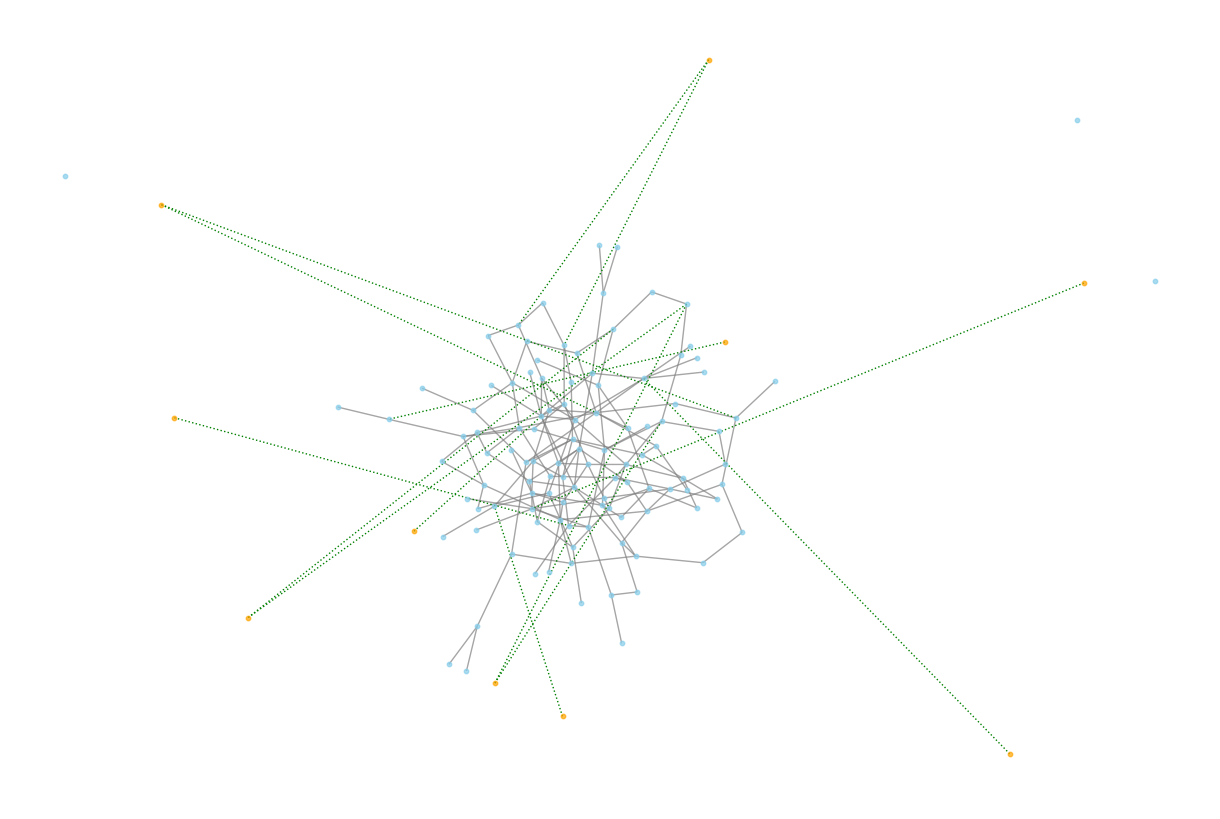

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Parameters
num_initial_nodes = 100
probability_of_edge = 0.03  # Reduced probability to make fewer connections
num_entering_nodes = 10
max_connections_per_new_node = 2  # Maximum number of connections for entering nodes
node_size = 10  # Smaller node size

# Initialize the network
G = nx.erdos_renyi_graph(num_initial_nodes, probability_of_edge)

# Function to draw the network with entering nodes
def draw_network_with_entering_nodes(G, entering_nodes):
    pos = nx.spring_layout(G)

    plt.figure(figsize=(12, 8))
    
    # Draw existing nodes and edges
    nx.draw(G, pos, with_labels=False, node_color='skyblue', edge_color='gray', node_size=node_size, alpha=0.7)
    
    # Draw entering nodes and their edges
    for new_node, connections in entering_nodes.items():
        pos[new_node] = (random.uniform(-1, 1), random.uniform(-1, 1))
        nx.draw_networkx_nodes(G, pos, nodelist=[new_node], node_color='orange', node_size=node_size, alpha=0.7)
        nx.draw_networkx_edges(G, pos, edgelist=[(new_node, conn) for conn in connections], style='dotted', edge_color='green')

#    plt.title("Network with Entering Nodes")
    plt.show()

# Add entering nodes with dotted lines
entering_nodes = {}
for i in range(num_entering_nodes):
    new_node = max(G.nodes, default=-1) + 1
    G.add_node(new_node)
    # Randomly connect the new node to some existing nodes with fewer connections
    connections = random.sample(G.nodes, k=random.randint(1, max_connections_per_new_node))
    for conn in connections:
        G.add_edge(new_node, conn)
    entering_nodes[new_node] = connections

# Draw the network
draw_network_with_entering_nodes(G, entering_nodes)


/tmp/ipykernel_34306/459491392.py:49: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  connections = random.sample(G.nodes, k=random.randint(1, max_connections_per_new_node))
/tmp/ipykernel_34306/459491392.py:55: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  leaving_nodes = random.sample(G.nodes, k=num_leaving_nodes)


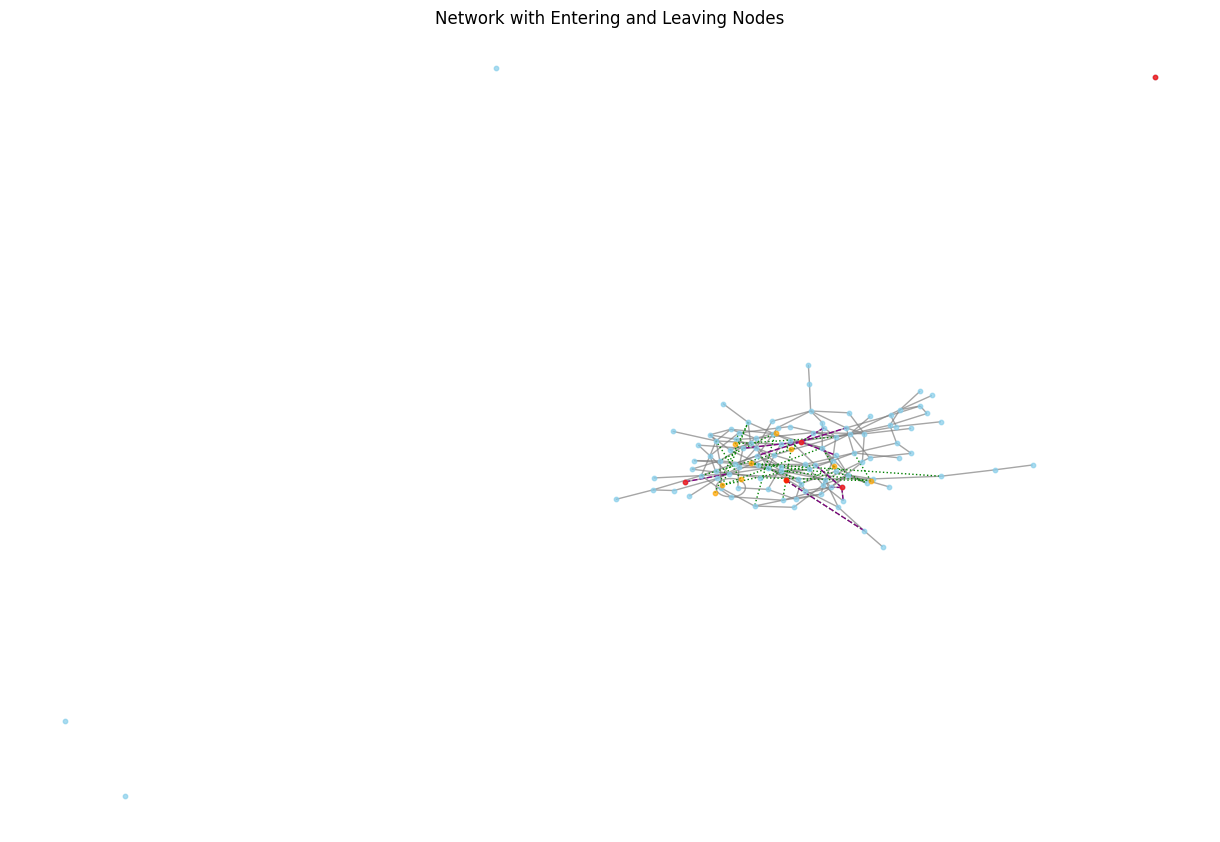

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Parameters
num_initial_nodes = 100
probability_of_edge = 0.03  # Reduced probability to make fewer connections
num_entering_nodes = 10
num_leaving_nodes = 5
max_connections_per_new_node = 3  # Maximum number of connections for entering nodes
node_size = 10  # Smaller node size
compact_factor = 0.5  # Factor to make the graph more compact

# Initialize the network
G = nx.erdos_renyi_graph(num_initial_nodes, probability_of_edge)

# Function to draw the network with entering and leaving nodes
def draw_network_with_entering_and_leaving_nodes(G, entering_nodes, leaving_nodes):
    pos = nx.spring_layout(G, k=compact_factor / np.sqrt(G.number_of_nodes()))

    plt.figure(figsize=(12, 8))
    
    # Draw existing nodes and edges
    nx.draw(G, pos, with_labels=False, node_color='skyblue', edge_color='gray', node_size=node_size, alpha=0.7)
    
    # Draw entering nodes and their edges
    for new_node, connections in entering_nodes.items():
        pos[new_node] = (random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1))  # Adjust position to be closer to the center
        nx.draw_networkx_nodes(G, pos, nodelist=[new_node], node_color='orange', node_size=node_size, alpha=0.7)
        nx.draw_networkx_edges(G, pos, edgelist=[(new_node, conn) for conn in connections], style='dotted', edge_color='green')

    # Draw leaving nodes and their edges
    for leaving_node in leaving_nodes:
        if leaving_node in pos:
            nx.draw_networkx_nodes(G, pos, nodelist=[leaving_node], node_color='red', node_size=node_size, alpha=0.7)
            for neighbor in G.neighbors(leaving_node):
                nx.draw_networkx_edges(G, pos, edgelist=[(leaving_node, neighbor)], style='dashed', edge_color='purple')

    plt.title("Network with Entering and Leaving Nodes")
    plt.show()

# Add entering nodes with dotted lines
entering_nodes = {}
for i in range(num_entering_nodes):
    new_node = max(G.nodes, default=-1) + 1
    G.add_node(new_node)
    # Randomly connect the new node to some existing nodes with fewer connections
    connections = random.sample(G.nodes, k=random.randint(1, max_connections_per_new_node))
    for conn in connections:
        G.add_edge(new_node, conn)
    entering_nodes[new_node] = connections

# Select leaving nodes
leaving_nodes = random.sample(G.nodes, k=num_leaving_nodes)

# Draw the network
draw_network_with_entering_and_leaving_nodes(G, entering_nodes, leaving_nodes)

# Remove leaving nodes from the graph
G.remove_nodes_from(leaving_nodes)


/tmp/ipykernel_34306/2006213196.py:40: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  connections = random.sample(G.nodes, k=random.randint(1, max_connections_per_new_node))


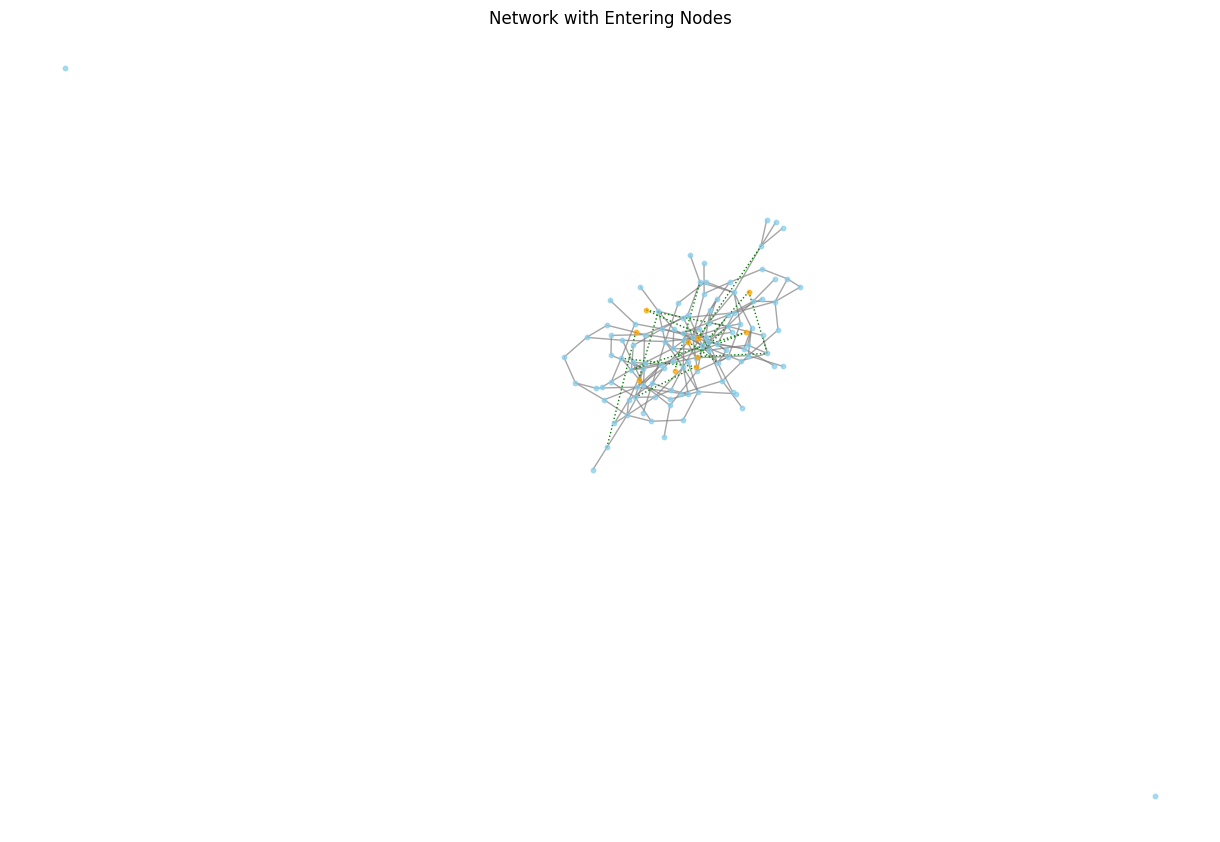

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Parameters
num_initial_nodes = 100
probability_of_edge = 0.03  # Reduced probability to make fewer connections
num_entering_nodes = 10
max_connections_per_new_node = 2  # Maximum number of connections for entering nodes
node_size = 10  # Smaller node size
compact_factor = 0.5  # Factor to make the graph more compact

# Initialize the network
G = nx.erdos_renyi_graph(num_initial_nodes, probability_of_edge)

# Function to draw the network with entering nodes
def draw_network_with_entering_nodes(G, entering_nodes):
    pos = nx.spring_layout(G, k=compact_factor / np.sqrt(G.number_of_nodes()))

    plt.figure(figsize=(12, 8))
    
    # Draw existing nodes and edges
    nx.draw(G, pos, with_labels=False, node_color='skyblue', edge_color='gray', node_size=node_size, alpha=0.7)
    
    # Draw entering nodes and their edges
    for new_node, connections in entering_nodes.items():
        pos[new_node] = (random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1))  # Adjust position to be closer to the center
        nx.draw_networkx_nodes(G, pos, nodelist=[new_node], node_color='orange', node_size=node_size, alpha=0.7)
        nx.draw_networkx_edges(G, pos, edgelist=[(new_node, conn) for conn in connections], style='dotted', edge_color='green')

    plt.title("Network with Entering Nodes")
    plt.show()

# Add entering nodes with dotted lines
entering_nodes = {}
for i in range(num_entering_nodes):
    new_node = max(G.nodes, default=-1) + 1
    G.add_node(new_node)
    # Randomly connect the new node to some existing nodes with fewer connections
    connections = random.sample(G.nodes, k=random.randint(1, max_connections_per_new_node))
    for conn in connections:
        G.add_edge(new_node, conn)
    entering_nodes[new_node] = connections

# Draw the network
draw_network_with_entering_nodes(G, entering_nodes)
